<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/Fun_with_NeuralNet_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kis hülyeség - Part 2

Csak egy kis móka.

MLPRegression soronként oszloponkétn n neuronnal.

Az elöző részben:

Azt láttuk, hogy nagyon lassan tanulja ráadásul rosszul becsüli a képből vett sorokat, pedig ez egy könnyű feladat lenne.

Ezért két másik módszert vizsgálunk meg.

In [385]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor

In [386]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

In [387]:
import skimage.io
import skimage.transform

In [388]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


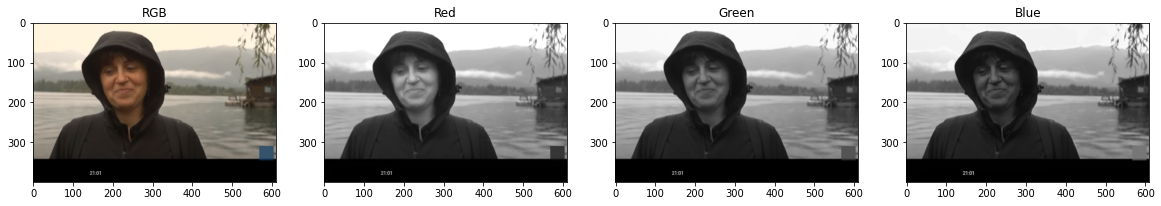

In [389]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [390]:
pic2 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

print(type(pic2))

print(pic2.shape)

red2   = pic2[:, :, 0]
green2 = pic2[:, :, 1]
blue2  = pic2[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


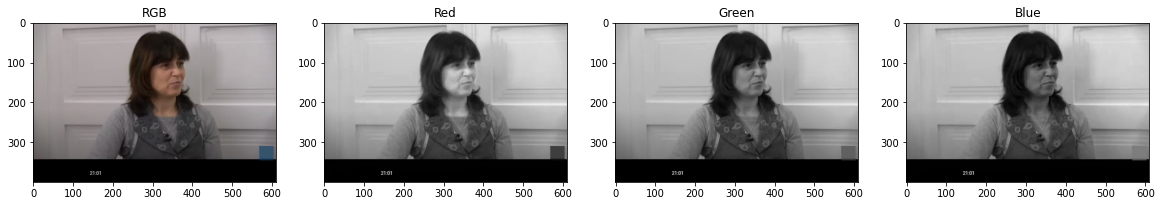

In [391]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic2, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red2, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green2, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue2, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [392]:
def get_picture(file = 'https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png'):
  pic = skimage.io.imread(file)

  print(type(pic))
  print(pic.shape)

  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  return pic, red, green, blue


def show_irgb(pic):
  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('RGB')
  ax2.imshow(red, cmap='gray'); ax2.set_title('Red')
  ax3.imshow(green, cmap='gray'); ax3.set_title('Green')
  ax4.imshow(blue, cmap='gray'); ax4.set_title('Blue')

  plt.show()

def show_gray(pic):
  fig, (ax1) = plt.subplots(1, 1, figsize=(5, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('Gray')

  plt.show()

def crop_img(pic, x, y, w, h):
  red_   = pic[y:y+h, x:x+w, 0]
  green_ = pic[y:y+h, x:x+w, 1]
  blue_  = pic[y:y+h, x:x+w, 2]
  pic_   = pic[y:y+h, x:x+w, :]

  return pic_, red_, green_, blue_

def resize_img(pic, w, h):
  pic_ = skimage.transform.resize(pic, (w, h))

  red_   = pic_[:, :, 0]
  green_ = pic_[:, :, 1]
  blue_  = pic_[:, :, 2]

  return pic_, red_, green_, blue_

def to_gray_img(pic):

  grey_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 0])/3

  return grey_


<class 'numpy.ndarray'>
(400, 610, 3)


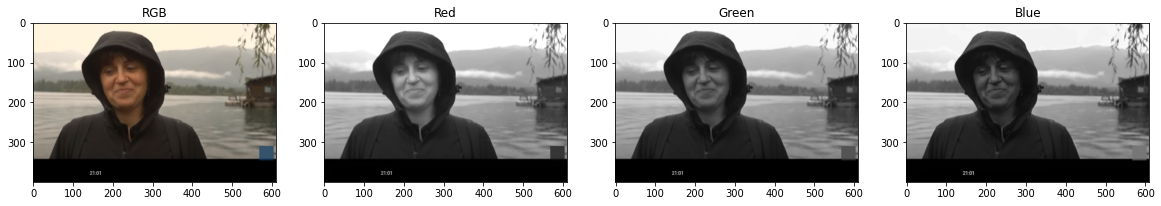

In [393]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

show_irgb(img)

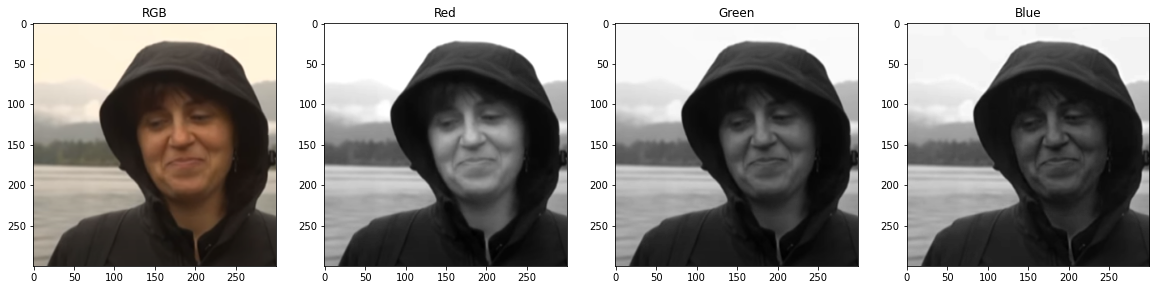

In [394]:
croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

show_irgb(croped_img)


<class 'numpy.ndarray'>
(400, 610, 3)


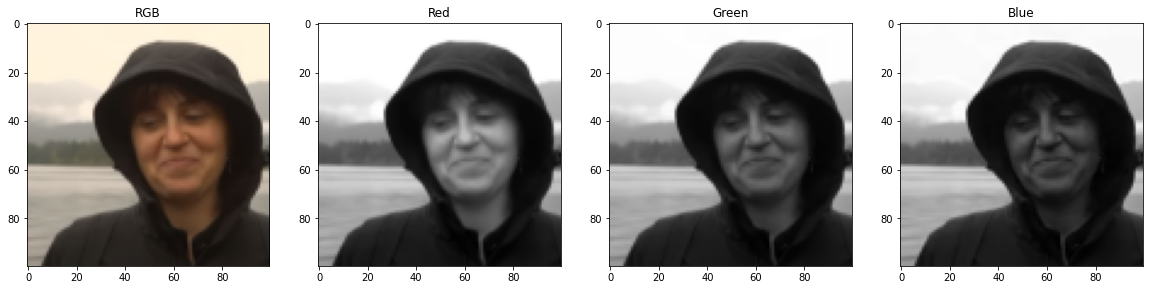

In [395]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman1 = resized_img

show_irgb(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


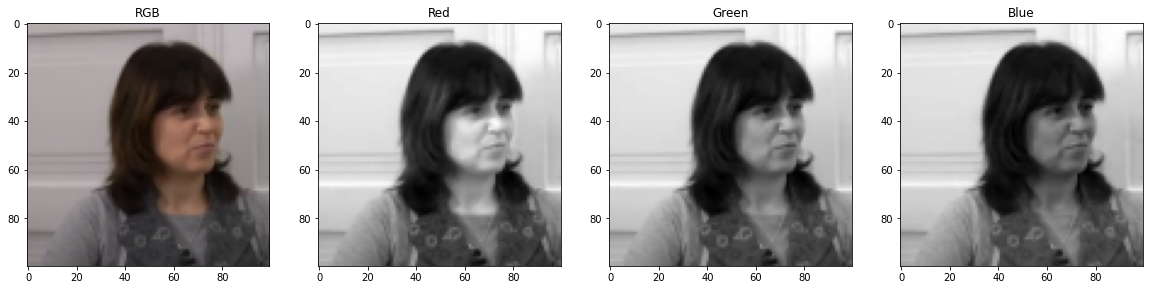

In [396]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman2 = resized_img

show_irgb(woman2)

<class 'numpy.ndarray'>
(400, 610, 3)


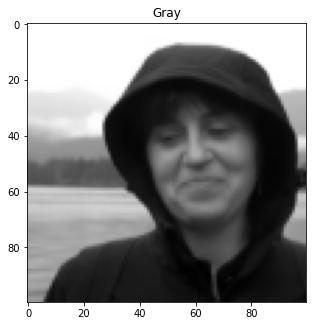

In [397]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman1 = gray_img

show_gray(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


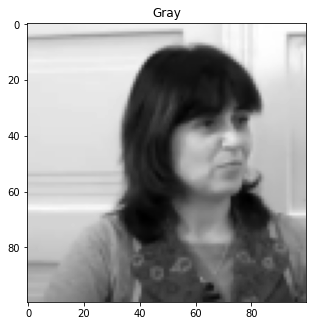

In [398]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman2 = gray_img

show_gray(woman2)

# Meg van a két képem, játék.

Menjünk végig a kép sorain, és mindegyikre csináljuk egy linreg, vagy MLPRegregression illesztést. Mentsük el a becslést.

In [399]:
# A kép
# woman1

img = woman1.copy()

print(img.shape)

rows = img.shape[0]
cols = img.shape[1]

_X_indicator = np.arange(0, 1, 1/cols)
print(_X_indicator.shape)

_X_indicator = _X_indicator.reshape(-1, 1)
print(_X_indicator.shape)


(100, 100)
(100,)
(100, 1)


In [400]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [401]:
mlp = MLPRegressor(hidden_layer_sizes=(10,20),
                   activation='tanh',
                   solver='lbfgs',                  # lbfgs sokkal gyorsabban konvergál mint az adam, viszont nincs neki loss_curve_ objektuma
                   batch_size=100,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=17000,
                   shuffle=True,
                   random_state=1,
                   warm_start=False,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=100000,
                   alpha=0.00000000000000001, tol=0.00000000000000001, early_stopping=True, epsilon=1e-30, max_fun=50000)


No handles with labels found to put in legend.


(2, 100)
(1, 100)
MSE =  0.0003953233207851125


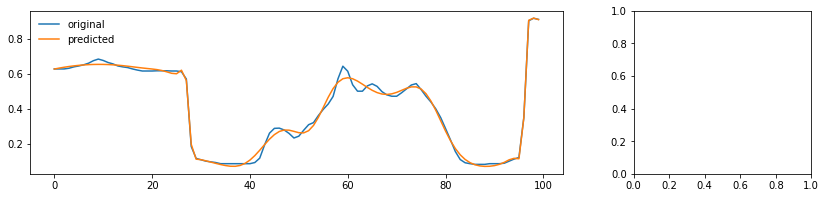

In [402]:
# Megvan a model, tanítsuk fel és kérjük le a súlyokat

# Nézzük meg elöször csak egy soron keresztül

_result = np.zeros((1, 100))

_y = img[42, :]

mlp.fit(_X_indicator, _y)
_predicted = mlp.predict(_X_indicator)
_result = np.vstack((_result, _predicted))
print(_result.shape)
_result = _result[1:, :]
print(_result.shape)
mse = mean_squared_error(_y, _predicted)
print('MSE = ', mse)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
a0.plot(_y, label = 'original')
a0.plot(_predicted, label = 'predicted')
a0.legend(frameon=False)
# a1.plot(mlp.loss_curve_, label = 'loss')
a1.legend(frameon=False)
plt.show()


# A model súlyokat alapul véve csinálunk egy Evolúciós szelekciót

A helyzet az, hogy ha programban idáig eljutottunk akkor van egy nagyon jól feltanított hálónk.

Mérjük meg, hogy mennyire jó aztán butítsuk le, hogy GA-val tudjunk rajta tanulni.

In [403]:

from copy import deepcopy


In [404]:
mlp.set_params().max_iter=1

mlp.set_params()

MLPRegressor(activation='tanh', alpha=1e-17, batch_size=100,
             early_stopping=True, epsilon=1e-30, hidden_layer_sizes=(10, 20),
             max_fun=50000, max_iter=1, n_iter_no_change=100000, random_state=1,
             solver='lbfgs', tol=1e-17, validation_fraction=0.0, verbose=0)

score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315


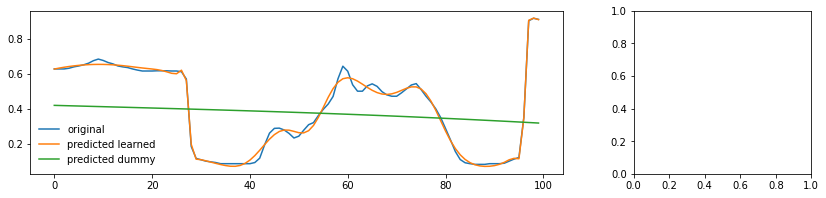

In [405]:
_pred0 = mlp.predict(_X_indicator)
_score0 = mean_squared_error(_y, _pred0)
print('score after sgd learning = ', _score0)

mlp_dummy = deepcopy(mlp)
mlp_dummy.set_params().max_iter=1
mlp_dummy.fit(_X_indicator, _y)
_pred1 = mlp_dummy.predict(_X_indicator)
_score1 = mean_squared_error(_y, _pred1)
print('score after reset the net = ', _score1)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
a0.plot(_y, label = 'original')
a0.plot(_pred0, label = 'predicted learned')
a0.plot(_pred1, label = 'predicted dummy')
a0.legend(frameon=False)
# a1.plot(mlp.loss_curve_, label = 'loss')
# a1.legend(frameon=False)
plt.show()

In [406]:
coefs = mlp_dummy.coefs_

In [407]:
type(coefs)

list

In [408]:
len(coefs)

3

In [409]:
a = mlp_dummy.coefs_[0].copy()

a + np.random.randn(coefs[0].shape[0],coefs[0].shape[1])

array([[-0.76404353,  0.89889078, -0.62477828,  0.00868582, -0.72278128,
        -0.20453058,  0.1016544 , -1.77847662,  0.70179173,  0.24779029]])

In [410]:
# hogyan tudjuk szabályozni azt, hogy mennyire randomizálja a súlyokat

a0 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1])
a1 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1])
a2 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1]) / 10
a3 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1]) / 100

print(a0)
print(a1)
print(a2)
print(a3)


[[ 0.09813035  0.75658171 -1.29025963  0.36521166  1.41697237 -1.41501373
  -0.32670582  0.42239835 -0.82673428 -1.10506772]]
[[-0.90495496 -0.47620812  0.24197982  0.19890943 -1.93334287 -0.84100257
  -0.91976719 -1.87439455 -0.44547628 -1.21235013]]
[[ 0.08387291  0.02625011  0.18668814 -0.17831736  0.204093   -0.11213935
  -0.04743812 -0.01607956  0.06120899  0.12952166]]
[[-0.02738084  0.01187191 -0.0095281  -0.00056702  0.01238526  0.01581708
  -0.00815228 -0.00867193  0.0079263   0.00170514]]


In [411]:
# Jól műmödik az algoritmusunk mert nem változtat a súlyokon semmit ---< Test >----

def randomizer(coefs):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    # _coefs[i] = coefs[i] + np.random.randn(coefs[i].shape[0], coefs[i].shape[1])
    _coefs[i] = coefs[i]

  return _coefs

def evolve(mlp_dummy):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = 3
  population = 10

  for i in range(generation):
    # a legjobb egyed
    best_solution = None
    best_score = 999999
    for j in range(population):
      a = randomizer(coefs)
      # print(a)
      working_mlp.coefs_ = a

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)

      # ha megvan a legjobb akkor azt tegye le a coefs változóba

    print('best_score in generation i = ', i, ' = ', best_score)


In [412]:
evolve(mlp)

i =  0 j =  0 score =  0.0003953233207851125
i =  0 j =  1 score =  0.0003953233207851125
i =  0 j =  2 score =  0.0003953233207851125
i =  0 j =  3 score =  0.0003953233207851125
i =  0 j =  4 score =  0.0003953233207851125
i =  0 j =  5 score =  0.0003953233207851125
i =  0 j =  6 score =  0.0003953233207851125
i =  0 j =  7 score =  0.0003953233207851125
i =  0 j =  8 score =  0.0003953233207851125
i =  0 j =  9 score =  0.0003953233207851125
best_score in generation i =  0  =  0.0003953233207851125
i =  1 j =  0 score =  0.0003953233207851125
i =  1 j =  1 score =  0.0003953233207851125
i =  1 j =  2 score =  0.0003953233207851125
i =  1 j =  3 score =  0.0003953233207851125
i =  1 j =  4 score =  0.0003953233207851125
i =  1 j =  5 score =  0.0003953233207851125
i =  1 j =  6 score =  0.0003953233207851125
i =  1 j =  7 score =  0.0003953233207851125
i =  1 j =  8 score =  0.0003953233207851125
i =  1 j =  9 score =  0.0003953233207851125
best_score in generation i =  1  =  0.0003

In [413]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    _ranodm_stregth = 100 # ----> nincs bekötve, majd megy a nevezőbe
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / 1000
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve(mlp_dummy):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = 3
  population = 10

  for i in range(generation):
    # a legjobb egyed
    best_solution = None
    best_score = 999999
    for j in range(population):
      a = randomizer(coefs)
      # print(a)
      working_mlp.coefs_ = a

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)

      # ha megvan a legjobb akkor azt tegye le a coefs változóba

    print('best_score in generation i = ', i, ' = ', best_score)


In [414]:
evolve(mlp)

i =  0 j =  0 score =  0.000427927273508435
i =  0 j =  1 score =  0.000642526170400352
i =  0 j =  2 score =  0.0006090018807561473
i =  0 j =  3 score =  0.0006877198535100115
i =  0 j =  4 score =  0.000476599962659921
i =  0 j =  5 score =  0.00045729190223162976
i =  0 j =  6 score =  0.0004818709278047188
i =  0 j =  7 score =  0.0004306792551894715
i =  0 j =  8 score =  0.00040195325339359103
i =  0 j =  9 score =  0.00041090836269149536
best_score in generation i =  0  =  0.00040195325339359103
i =  1 j =  0 score =  0.0004795255980612065
i =  1 j =  1 score =  0.00048784100658366637
i =  1 j =  2 score =  0.00055026920937977
i =  1 j =  3 score =  0.0006480650016730771
i =  1 j =  4 score =  0.00041372011311422417
i =  1 j =  5 score =  0.0004141223456056492
i =  1 j =  6 score =  0.0004467721224271189
i =  1 j =  7 score =  0.00041317558828439
i =  1 j =  8 score =  0.0004464154178425016
i =  1 j =  9 score =  0.0004117369397132899
best_score in generation i =  1  =  0.00041

In [415]:
0.0003953233207851125

# Ehhez képest csak romlott

# Ennek az egyik oka, hogy tulajdonképpen az összes súlyon módosítok

0.0003953233207851125

In [416]:
# Nézzük meg, hogy a dummy mlp resetelt súlyó modellen milyen eredményeket adna.


_pred_dummy = mlp_dummy.predict(_X_indicator)
_score_dummy = mean_squared_error(_y, _pred_dummy)
print('score dummy net = ', _score_dummy)

score dummy net =  0.05238925670809315


In [417]:
# Ehhez képest kéne elérni valami javulást a randomizációval

In [418]:
evolve(mlp_dummy)

i =  0 j =  0 score =  0.052311557438696185
i =  0 j =  1 score =  0.05231768330415696
i =  0 j =  2 score =  0.05234142947854717
i =  0 j =  3 score =  0.05225878461281051
i =  0 j =  4 score =  0.05236209095526217
i =  0 j =  5 score =  0.052437758274186654
i =  0 j =  6 score =  0.0525365316855688
i =  0 j =  7 score =  0.052317166341878725
i =  0 j =  8 score =  0.052286809542442046
i =  0 j =  9 score =  0.052457978506632814
best_score in generation i =  0  =  0.05225878461281051
i =  1 j =  0 score =  0.05236595489842933
i =  1 j =  1 score =  0.05240531482877737
i =  1 j =  2 score =  0.05228317549584464
i =  1 j =  3 score =  0.052524029189764496
i =  1 j =  4 score =  0.05230174046628628
i =  1 j =  5 score =  0.052435685728753186
i =  1 j =  6 score =  0.05259596787762278
i =  1 j =  7 score =  0.05243626899790156
i =  1 j =  8 score =  0.05237730714138355
i =  1 j =  9 score =  0.0523297717856748
best_score in generation i =  1  =  0.05228317549584464
i =  2 j =  0 score =  

In [419]:
# rendben úgy látszik, hogy a randomizációval sikerül úgy modosítani a súlyokat, hogy néha jobb eredményt kapjunk

# írjuk tovább az evolve függvényt, hogy generációról generációra örökítse át a legjobb modelt és azokat randomizálja




In [420]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    _ranodm_stregth = 100 # ----> nincs bekötve, majd megy a nevezőbe
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv1(mlp_dummy, generation = 10, population = 10, print_population = True, print_generation = (True, 1), random_factor = 1000):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  population_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []
    # a legjobb egyed
    # best_mlp_solution = None # --> nem itt kel inicializálni
    best_score = 999999
    for j in range(population):
      coefs = best_mlp_solution.coefs_ # --> megkapja az éppen legjobb coeficienseit
      a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      # print(a)
      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [421]:
generation_scores, best_scores, _ = evolve_adv1(mlp_dummy, generation = 20, print_population=False)

best_score in generation i =  0  =  0.052392642204372175
best_score in generation i =  1  =  0.05211507813419801
best_score in generation i =  2  =  0.05203069720581729
best_score in generation i =  3  =  0.05160640682949319
best_score in generation i =  4  =  0.051378060772427514
best_score in generation i =  5  =  0.051219914430727286
best_score in generation i =  6  =  0.05107340812691005
best_score in generation i =  7  =  0.050916069285904496
best_score in generation i =  8  =  0.05078349940857132
best_score in generation i =  9  =  0.050688829464095676
best_score in generation i =  10  =  0.050515975556232634
best_score in generation i =  11  =  0.05015102426261573
best_score in generation i =  12  =  0.05008618030206885
best_score in generation i =  13  =  0.04989946770153291
best_score in generation i =  14  =  0.049859499661780896
best_score in generation i =  15  =  0.049786663529424964
best_score in generation i =  16  =  0.04972143144998639
best_score in generation i =  17 

In [422]:

def plot_generation_scatter(generation_scores):

  m = np.zeros((len(generation_scores), len(generation_scores[0])))
  # print(m.shape)

  for i in range(len(generation_scores)):
    for j in range(len(generation_scores[i])):
      m[i, j] = generation_scores[i][j]

  # --- kell csinálni egy [0, 1, 2, ..., 0, 1, 2, ..., 0, 1, 2] vektort is az lesz majd az x -tengely
  n = np.arange(1, len(generation_scores) + 1, 1)
  a = []
  for _ in range(len(generation_scores[0])):
    a.append(n)
  b = np.array(a)
  c = b.flatten()

  # --- ki kell teríteni a mátrixba rakott score-okat és kész is
  s = m.flatten(order='C')
  s = m.flatten(order='F')

  # --- plot
  # plt.scatter(c, s)
  
  return c, s

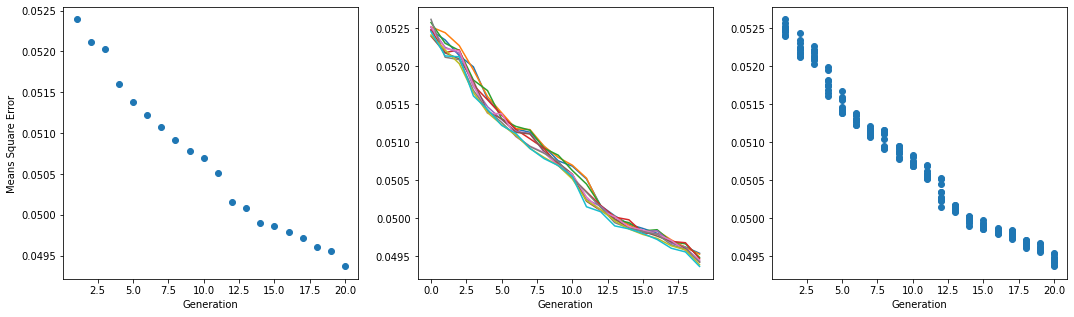

In [423]:
fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
_number_of_generation = len(best_scores)
_x_axis = np.arange(1, _number_of_generation+1, 1)
a0.scatter(_x_axis, best_scores)
a0.set_ylabel('Means Square Error')
a0.set_xlabel('Generation')

a1.plot(generation_scores)
a1.set_xlabel('Generation')

c, s = plot_generation_scatter(generation_scores)

a2.scatter(c, s)
a2.set_xlabel('Generation')
plt.show()

# Na akkor most egyben az egész, mert ez így nagyon sok

In [424]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500))

best_score in generation i =  0  =  0.052169357438173296
best_score in generation i =  500  =  0.04344444764900802
best_score in generation i =  1000  =  0.04164080514385384
best_score in generation i =  1500  =  0.041210108744173135
best_score in generation i =  2000  =  0.040708922914729495
best_score in generation i =  2500  =  0.03973966113103851
best_score in generation i =  3000  =  0.036628315302824795
best_score in generation i =  3500  =  0.03254696802383406
best_score in generation i =  4000  =  0.03002602394322156
best_score in generation i =  4500  =  0.029507306340565375
CPU times: user 31 s, sys: 124 ms, total: 31.1 s
Wall time: 31.1 s


## Ezt a 3 Plotter meg tegyük ki egy függvénybe

In [425]:
def plot(generation_scores, best_scores, order = 'col'):
  '''
  generation_scores, best_scores
  '''

  if( order == 'col' ):
    fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
  if( order == 'row' ):
    fig, (a0, a1, a2) = plt.subplots(3, 1, figsize=(18, 15))

  _number_of_generation = len(best_scores)
  _x_axis = np.arange(1, _number_of_generation+1, 1)
  a0.scatter(_x_axis, best_scores)
  a0.set_ylabel('Means Square Error')
  a0.set_xlabel('Generation Best')


  a1.plot(generation_scores)
  a1.set_xlabel('Generation all')

  c, s = plot_generation_scatter(generation_scores)

  a2.scatter(c, s)
  a2.set_xlabel('Generation all')
  plt.show()


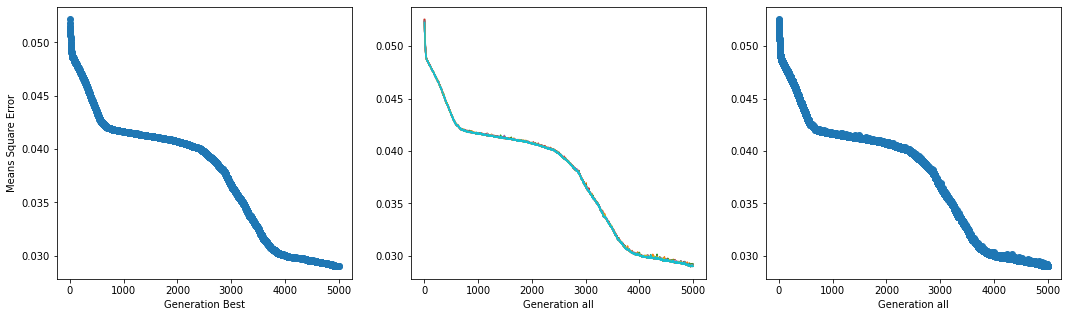

In [426]:
plot(generation_scores, best_scores)

In [427]:
def plot_two(mlp_original, mlp_evolved):
  _pred0 = mlp.predict(_X_indicator)                        # Az eredeti SGD() feltanított mlp
  _score0 = mean_squared_error(_y, _pred0)
  print('score after sgd learning = ', _score0)

  mlp_dummy = deepcopy(mlp)                                 # A sík hülye dummy mlp
  mlp_dummy.set_params().max_iter=1
  mlp_dummy.fit(_X_indicator, _y)
  _pred1 = mlp_dummy.predict(_X_indicator)
  _score1 = mean_squared_error(_y, _pred1)
  print('score after reset the net = ', _score1)

  _pred2 = mlp_evolved.predict(_X_indicator)
  _score2 = mean_squared_error(_y, _pred2)
  print('score after evolve the net = ', _score2)

  fig, (a0) = plt.subplots(1, 1, figsize=(9.5, 3))
  a0.plot(_y, label = 'original')
  a0.plot(_pred0, label = 'predicted learned')
  a0.plot(_pred1, label = 'predicted dummy')
  a0.plot(_pred2, label = 'predicted evolved')
  a0.legend(frameon=False)
  plt.show()


score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315
score after evolve the net =  0.02899560439284254


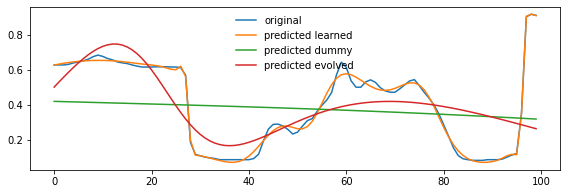

In [428]:
plot_two(mlp, best_mlp)

# Ez eddig tetszik

Most játszok egy kicsit a súlyokat variáló random beállításaival

In [429]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500), random_factor=100)

best_score in generation i =  0  =  0.0523309624860778
best_score in generation i =  500  =  0.0416152852146695
best_score in generation i =  1000  =  0.03919095951562456
best_score in generation i =  1500  =  0.03642660847912911
best_score in generation i =  2000  =  0.038197505064360315
best_score in generation i =  2500  =  0.03395563348801158
best_score in generation i =  3000  =  0.034879123951934335
best_score in generation i =  3500  =  0.029184982682675695
best_score in generation i =  4000  =  0.030224439347008934
best_score in generation i =  4500  =  0.0331309576031872
CPU times: user 30.3 s, sys: 112 ms, total: 30.4 s
Wall time: 30.4 s


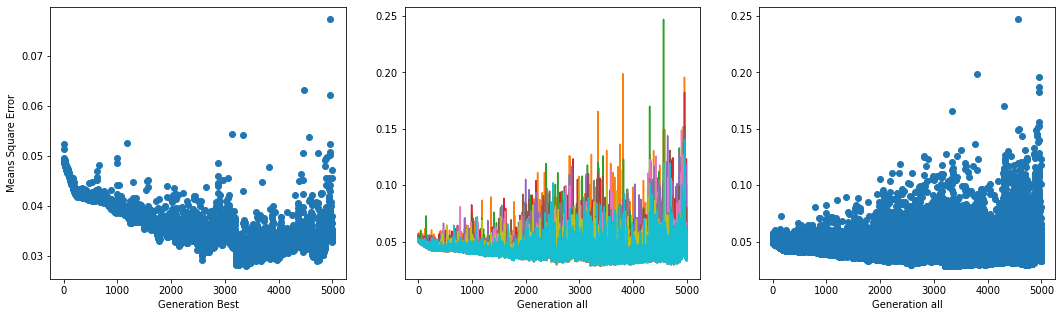

In [430]:
plot(generation_scores, best_scores)

# Fent

Amit itt látni kell vagy látni érdemes,

Hogy mivel nem volt **keep the best** tehát nem tartjuk meg a generáció legjobbját.

Ezért előfordulhat, hogy **mutáció** vagy randomizálás után az új populációban nem lesz olyan megoldás ami jobb mint a régebbi populáció, sőt még az is lehet, hogy rosszabb értéket kapunk.

Tulajdonképpen ezt látjuk a bal oldali ábrán.

Érdkes módon viszont így is konvergál és halad az egyre jobb megoldások felé, csak elég nagy szóródással.

A jobb oldali ábrán viszont az látszik, hogy egyre nagyobb a szóródás egy egy generációban a populáció egyes tagjai között is idővel.

# Ez nagyon tetszik,

Csináljunk még néhány kíséletet a mutáció faktorának beállításaival.



```
# További ötleteim egyébként

# - Néha tanuljon rá a gradiens módszerre, azátn ismét GA módba váltson át

# - Tartsa meg a legjobbat

# - Tartsa meg a legjobbat és ne minden súlyt változtasson hanem véletleszerűen egy bizonyos mennyiséget

# - Tartsa meg a legjobbat és néha változtasson a mutáció mértékén 'random_factor'
```


# Szorakozok még egy kicsit a beállításokkal.

Aztán továbblépünk...

In [431]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500), random_factor=500)

best_score in generation i =  0  =  0.05237664114623124
best_score in generation i =  500  =  0.042554204124398004
best_score in generation i =  1000  =  0.041236272965867855
best_score in generation i =  1500  =  0.04045725822935834
best_score in generation i =  2000  =  0.037641575306334545
best_score in generation i =  2500  =  0.032158363693621766
best_score in generation i =  3000  =  0.029837077394267008
best_score in generation i =  3500  =  0.029656850502093643
best_score in generation i =  4000  =  0.0290866203169525
best_score in generation i =  4500  =  0.028527167308512943
CPU times: user 30.3 s, sys: 124 ms, total: 30.4 s
Wall time: 30.4 s


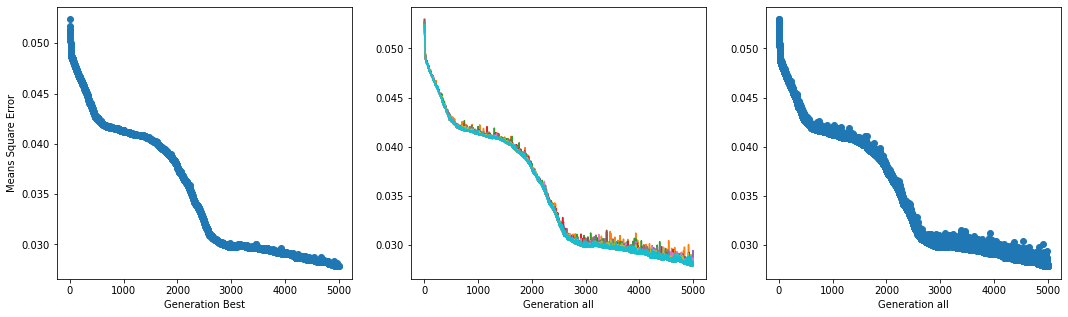

In [432]:
plot(generation_scores, best_scores)

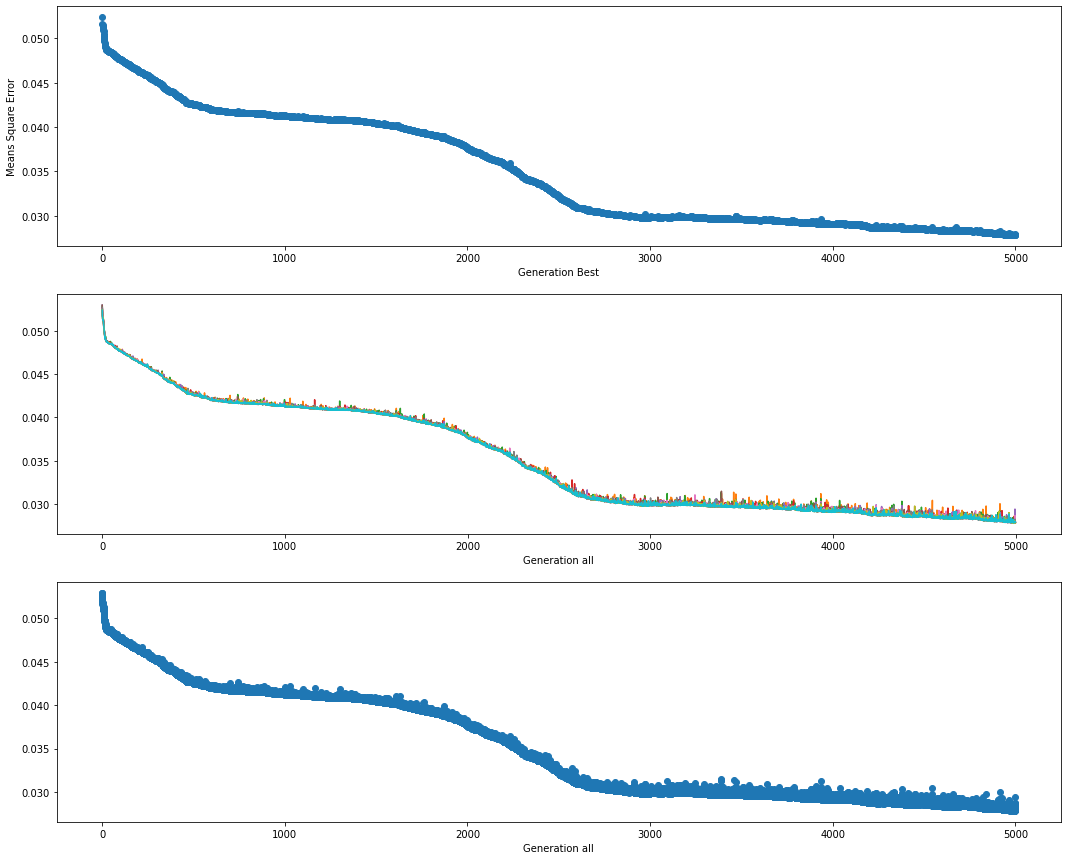

In [433]:
plot(generation_scores, best_scores, order='row')

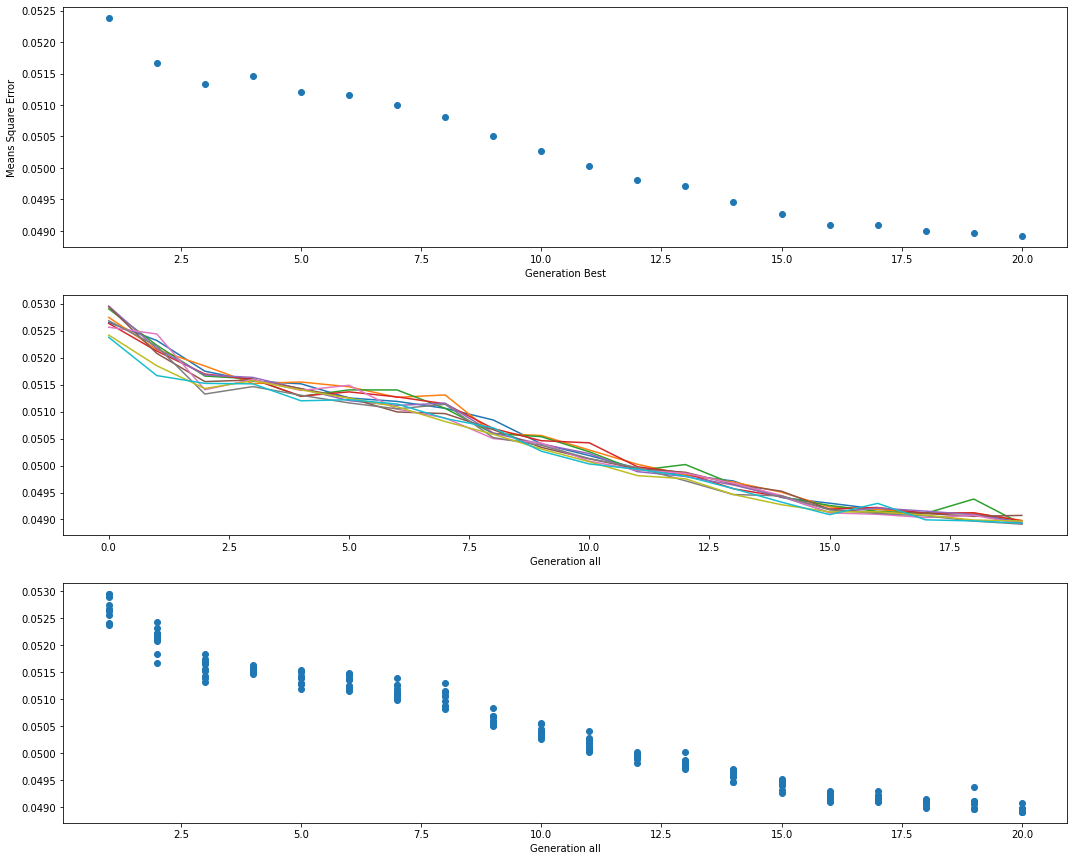

In [434]:
plot(generation_scores[0:20], best_scores[0:20], order='row')

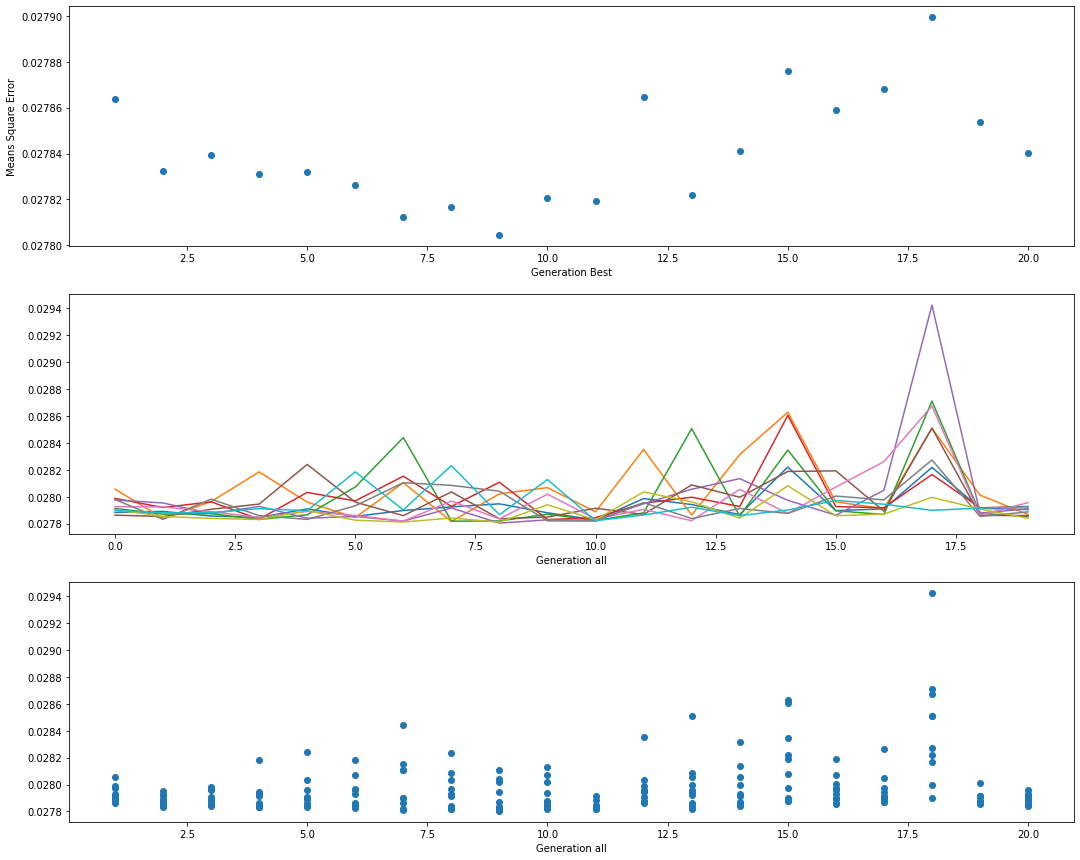

In [435]:
plot(generation_scores[-20:], best_scores[-20:], order='row')

# Fent

Ami látszik.

Az elejét **\[0:20\]** majd egy második lekérdezésben a végét **\[-20:\]** rajzoltattam csak ki.

A végén már nagyon ugrálnak az eredmények.

Ki kéne próbálni a **keep best** módszert is.

De elötte még hagyom, hogy jó sokáig fusson.

In [436]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 20000,
                                                       print_population=False,
                                                       print_generation=(True, 1000), random_factor=500)

best_score in generation i =  0  =  0.051800575772815265
best_score in generation i =  1000  =  0.041269646639147554
best_score in generation i =  2000  =  0.03727510046624949
best_score in generation i =  3000  =  0.03009977201947163
best_score in generation i =  4000  =  0.027624746322971832
best_score in generation i =  5000  =  0.02503473219106982
best_score in generation i =  6000  =  0.023564573136047498
best_score in generation i =  7000  =  0.022753833841089723
best_score in generation i =  8000  =  0.022154320550170727
best_score in generation i =  9000  =  0.02159036675444674
best_score in generation i =  10000  =  0.02100117105221314
best_score in generation i =  11000  =  0.020582368993209657
best_score in generation i =  12000  =  0.020182563575242608
best_score in generation i =  13000  =  0.01959032734141447
best_score in generation i =  14000  =  0.019275530396986016
best_score in generation i =  15000  =  0.018810106481194536
best_score in generation i =  16000  =  0.0

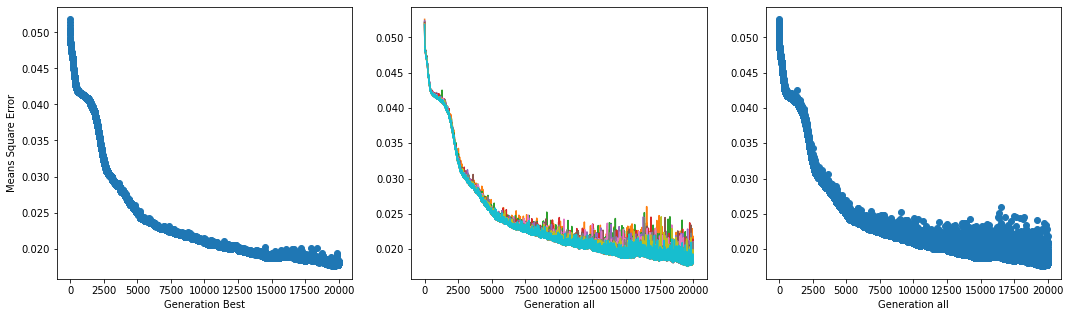

In [437]:
plot(generation_scores, best_scores)

# Irjuk meg Keep Best esetre is

Azóta ezt függvényt átírtam mert voltak vele alapvető problémák.

Ezekre leginkább akkor került sor, amikor változtattam rajta úgy, hogy a generáció egyes elemeiben ne az összes súlyt, hanem csak egy váletlenszerűen kiválaszott súlyt variáljon.

Ekkor derült ki, hogy van egy alapvető hiba a lenti kódban, amit két okból hagyok meg.

1. egyrészt érdekes, hogy így is képes evolválódni, sőt gyorsan evolválodik.
2. tanulság és emlékeztető, hogy példányosított objektum valamely propertijét ha elképrem akkor sem tudom copy() függvénnyel új példányba tenni.<br>
<br>
Ez most nekem még új Pythonban de nagyon megszívtam vele mire rájötem.

In [438]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):

  _coefs = coefs.copy()       # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer
  
  for i in range(len(coefs)):
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv2(mlp_dummy, generation = 10,
                population = 10,
                keep_best = False,
                print_population = True,
                print_generation = (True, 1),
                random_factor = 1000):
  
  coefs = mlp_dummy.coefs_    # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer

  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []

    best_score = 999999
    for j in range(population):
      coefs = best_mlp_solution.coefs_ # <------------------------ igazi szívás, ez ugyanis egy pointer
                                       #                           igy ha a cikluson belül értéket adok a best_mlp_solution.coefs_ nek
                                       #                           akkor következő iterációnál már nem az erdetei értékeket olvasa be
                                       #                           ahogy gondoltam volna, hanem egy már módosított értéket
                                       #
                                       #                           ezáltál --> továbbmegy ez a coef és később felülcsapom

      # --> mutáció indul minden egyes egyed esetében
      if( keep_best == True ):
        if( j == 0):
          # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt -> ne randomizáljon
          a = coefs
          pass
        else:
          a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      else:
        a = randomizer(coefs, random_factor)              # --> randomizálja a súlyokat
      # --> vége a súlymutációnak

      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----< population iteráció vége

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [439]:
# Az új - evolve_adv2

%%time
generation_scores, best_scores, best_mlp = evolve_adv2(mlp_dummy,
                                                       generation = 200,
                                                       print_population=False,
                                                       print_generation=(True, 20), random_factor=500)


best_score in generation i =  0  =  0.05174131593354751
best_score in generation i =  20  =  0.048698447153846566
best_score in generation i =  40  =  0.04823718768035385
best_score in generation i =  60  =  0.04793370424245046
best_score in generation i =  80  =  0.04752854164847054
best_score in generation i =  100  =  0.04729137093727034
best_score in generation i =  120  =  0.04697614694151493
best_score in generation i =  140  =  0.046797636427447664
best_score in generation i =  160  =  0.04669845937148451
best_score in generation i =  180  =  0.046453655152228567
CPU times: user 1.35 s, sys: 12.9 ms, total: 1.37 s
Wall time: 1.37 s


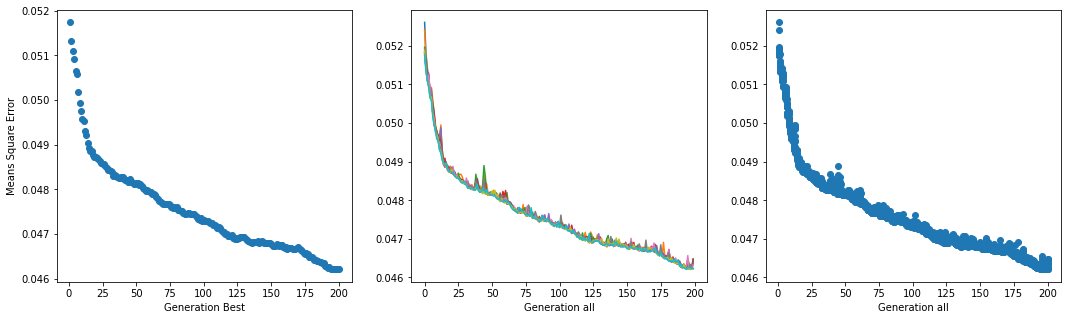

In [440]:
plot(generation_scores, best_scores)

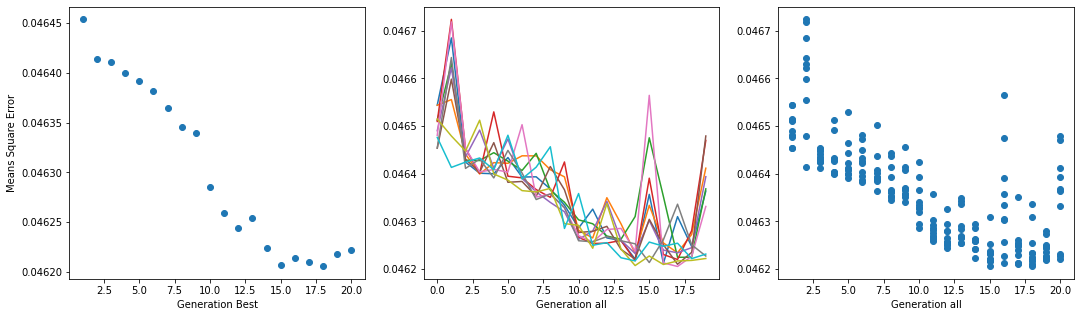

In [441]:
plot(generation_scores[-20:], best_scores[-20:])

In [442]:
# A régi - evolve_adv1

%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 200,
                                                       print_population=False,
                                                       print_generation=(True, 20), random_factor=500)

best_score in generation i =  0  =  0.05203127244383311
best_score in generation i =  20  =  0.04900658421723856
best_score in generation i =  40  =  0.0486290140571989
best_score in generation i =  60  =  0.04835277367095275
best_score in generation i =  80  =  0.048031910857671486
best_score in generation i =  100  =  0.04789078131627087
best_score in generation i =  120  =  0.04762492451952345
best_score in generation i =  140  =  0.04737856872980124
best_score in generation i =  160  =  0.04721528977516888
best_score in generation i =  180  =  0.04701929023026776
CPU times: user 1.34 s, sys: 12 ms, total: 1.35 s
Wall time: 1.36 s


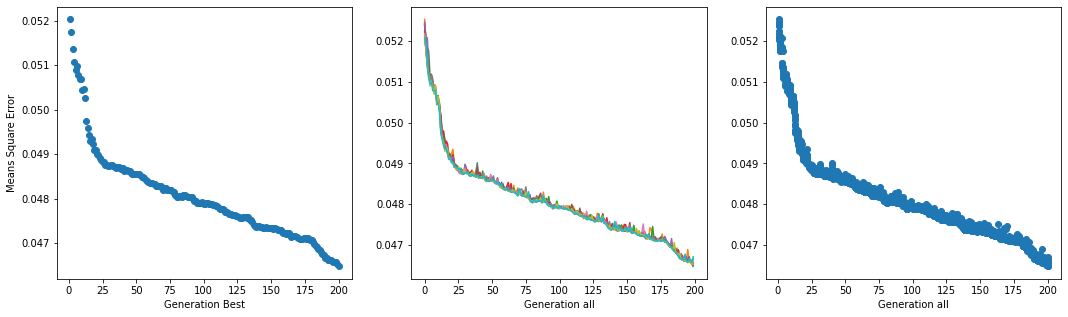

In [443]:
plot(generation_scores, best_scores)

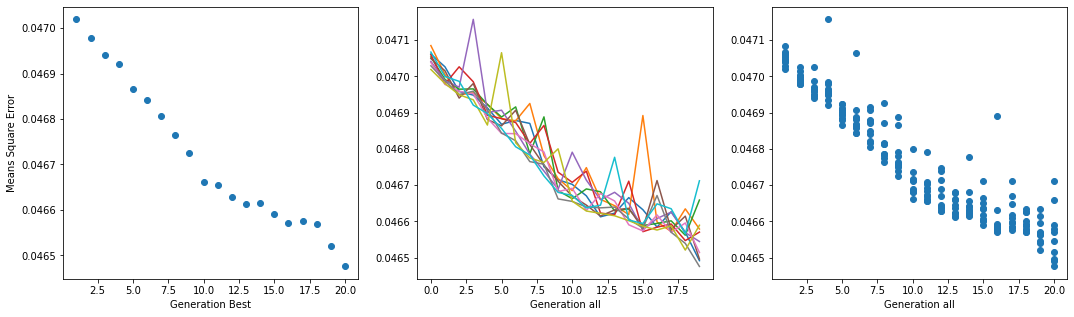

In [444]:
plot(generation_scores[-20:], best_scores[-20:])

In [445]:
# Na most kapcsoljuk be a keep_best = True

%%time
generation_scores, best_scores, best_mlp = evolve_adv2(mlp_dummy,
                                                       generation = 200,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 20),
                                                       random_factor=500)



best_score in generation i =  0  =  0.05154628824746571
best_score in generation i =  20  =  0.04874781914598716
best_score in generation i =  40  =  0.048417403672893024
best_score in generation i =  60  =  0.04780444904930972
best_score in generation i =  80  =  0.04735065828927667
best_score in generation i =  100  =  0.04708026441250204
best_score in generation i =  120  =  0.046771582843115674
best_score in generation i =  140  =  0.04642185626392546
best_score in generation i =  160  =  0.04611608002457755
best_score in generation i =  180  =  0.04580650115876315
CPU times: user 1.31 s, sys: 9.04 ms, total: 1.32 s
Wall time: 1.32 s


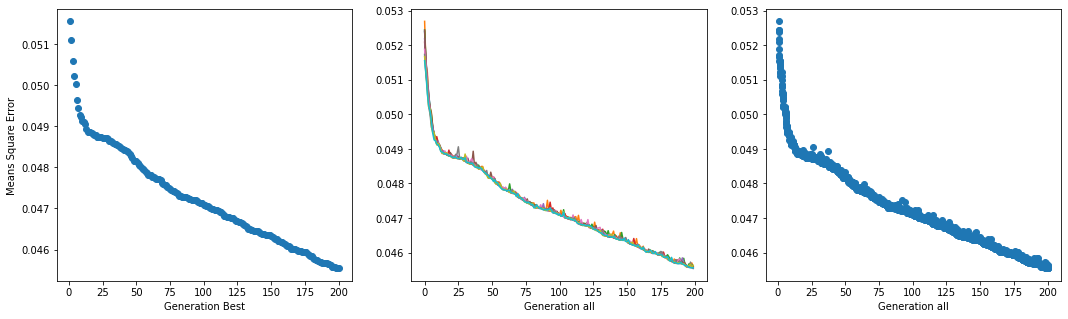

In [446]:
plot(generation_scores, best_scores)

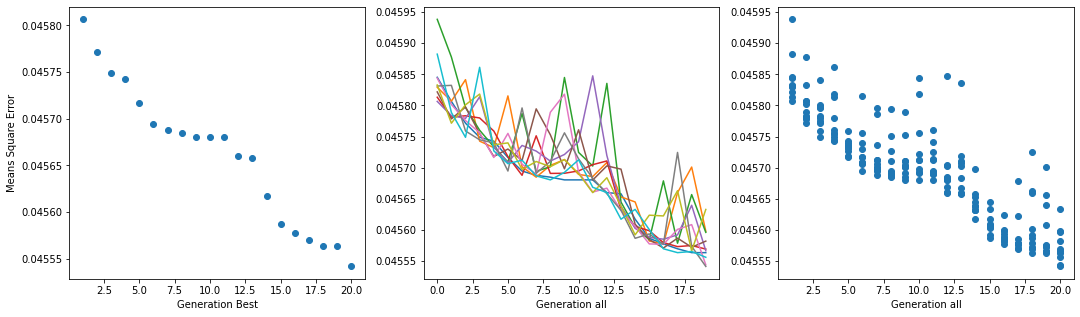

In [447]:
plot(generation_scores[-20:], best_scores[-20:])

# Fent

Bal felül: Mivel a **keep_best** be van kapcsolava, ezért mindíg megtartja a legjobbat és átviszi a következő generációra ezért rosszabb eredményt a következő generációban sem érthet el legfeljebb azonosat.

# Most

Futtassuk meg úgy, hogy nagyobbra veszem a mutációs rátát, **random_factor** és hasonlítsuk össze a két módszert.

In [448]:
# Keep Best --> False

%%time
generation_scores_kb_false, best_scores_kb_false, best_mlp_kb_false = evolve_adv2(mlp_dummy,
                                                       generation = 1000,
                                                       keep_best = False,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100)



best_score in generation i =  0  =  0.05062428825354621
best_score in generation i =  200  =  0.041398644594261125
best_score in generation i =  400  =  0.03987857858831452
best_score in generation i =  600  =  0.03527099853527347
best_score in generation i =  800  =  0.03268722881121993
CPU times: user 6.15 s, sys: 27.6 ms, total: 6.17 s
Wall time: 6.18 s


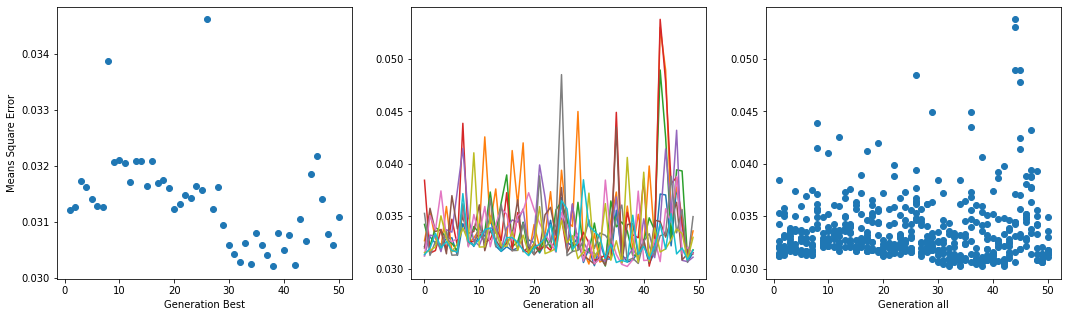

In [449]:
plot(generation_scores_kb_false[-50:], best_scores_kb_false[-50:])

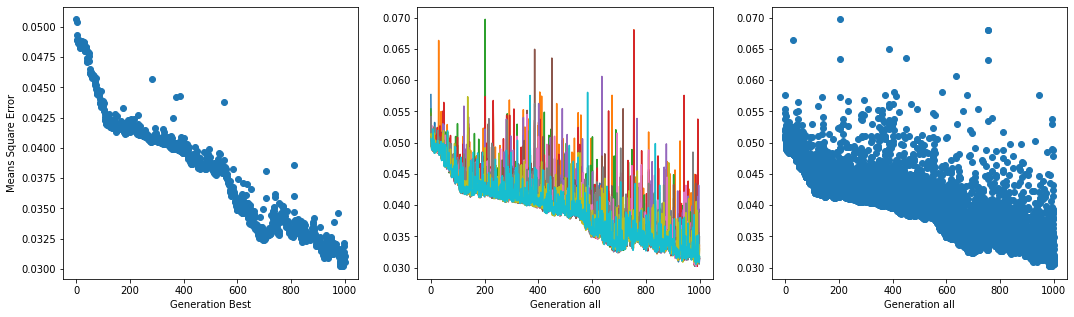

In [450]:
plot(generation_scores_kb_false, best_scores_kb_false)

In [451]:
# Keep Best --> True

%%time
generation_scores_kb_true, best_scores_kb_true, best_mlp_kb_true = evolve_adv2(mlp_dummy,
                                                       generation = 1000,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100)



best_score in generation i =  0  =  0.051681209033565934
best_score in generation i =  200  =  0.04197013991371976
best_score in generation i =  400  =  0.04124954149132076
best_score in generation i =  600  =  0.040877544493195556
best_score in generation i =  800  =  0.040235866979107957
CPU times: user 5.08 s, sys: 21.6 ms, total: 5.1 s
Wall time: 5.12 s


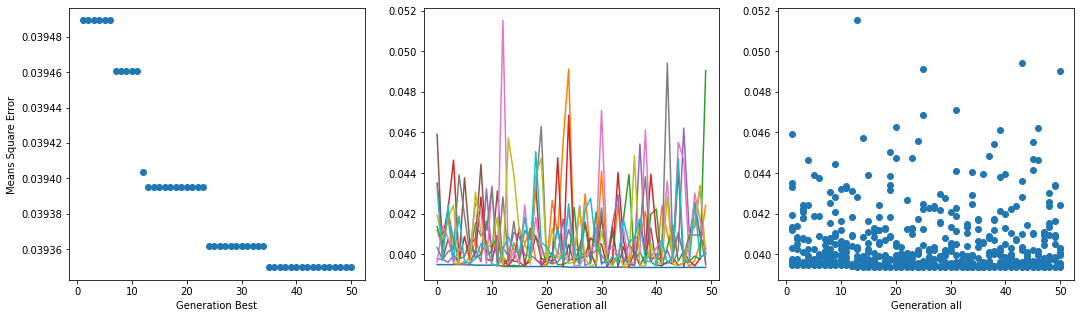

In [452]:
plot(generation_scores_kb_true[-50:], best_scores_kb_true[-50:])

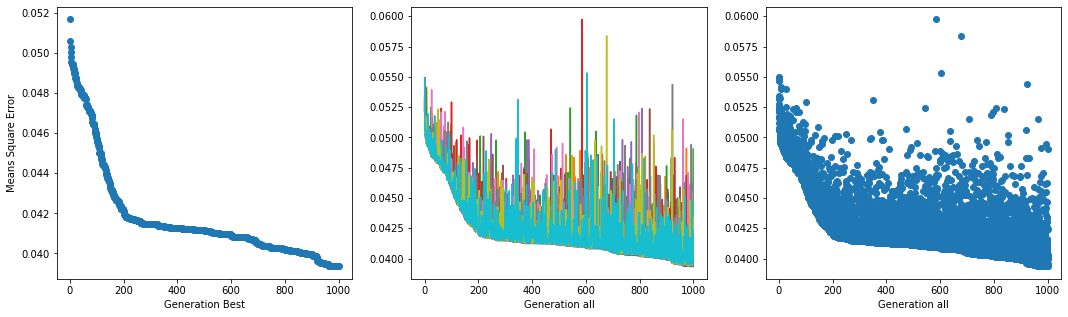

In [453]:
plot(generation_scores_kb_true, best_scores_kb_true)

# Fent

Annyi látszik (jobb oldali ábra) hogy ez még így is iszaonyatosan pazarló. Hiszen a megoldásoknak csak töredéke által jut el egy egy jobb megoldáshoz.

Viszont a **keep_best miatt** nincs visszalépés az egyes generációk között.

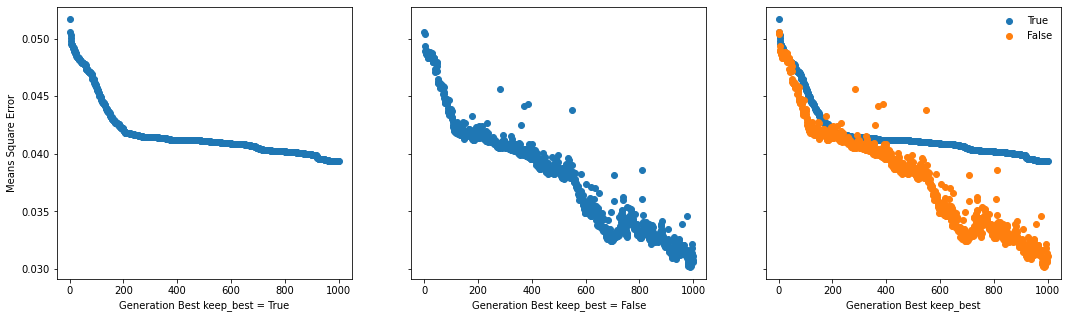

In [454]:
def plot_compare(one, two):
  fig, (a0, a1, a2) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
  _n = len(one)
  _x_axis = np.arange(1, _n+1, 1)

  a0.scatter(_x_axis, one)
  a0.set_ylabel('Means Square Error')
  a0.set_xlabel('Generation Best keep_best = True')

  _n = len(two)
  _x_axis = np.arange(1, _n+1, 1)

  a1.scatter(_x_axis, two)
  a1.set_xlabel('Generation Best keep_best = False')

  a2.scatter(_x_axis, one, label = 'True')
  a2.scatter(_x_axis, two, label = 'False')
  a2.set_xlabel('Generation Best keep_best')
  a2.legend(frameon=False)

  plt.show()

plot_compare(best_scores_kb_true, best_scores_kb_false)

In [455]:
# Keep Best --> False

%%time
generation_scores_kb_false, best_scores_kb_false, best_mlp_kb_false = evolve_adv2(mlp_dummy,
                                                       generation = 5000,
                                                       keep_best = False,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=200)



best_score in generation i =  0  =  0.05087931550569582
best_score in generation i =  200  =  0.04516011145045607
best_score in generation i =  400  =  0.0419878949818239
best_score in generation i =  600  =  0.0415502718992837
best_score in generation i =  800  =  0.04098041718046323
best_score in generation i =  1000  =  0.04052909316131438
best_score in generation i =  1200  =  0.039932854573415534
best_score in generation i =  1400  =  0.03931467289186583
best_score in generation i =  1600  =  0.03728812269150322
best_score in generation i =  1800  =  0.03526466735453782
best_score in generation i =  2000  =  0.033113622201106696
best_score in generation i =  2200  =  0.032765027002332386
best_score in generation i =  2400  =  0.03184877028381476
best_score in generation i =  2600  =  0.031592714294264156
best_score in generation i =  2800  =  0.030610891509514612
best_score in generation i =  3000  =  0.030629974988398985
best_score in generation i =  3200  =  0.029990743097222335

In [456]:
# Keep Best --> True

%%time
generation_scores_kb_true, best_scores_kb_true, best_mlp_kb_true = evolve_adv2(mlp_dummy,
                                                       generation = 5000,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=200)



best_score in generation i =  0  =  0.051643265156459034
best_score in generation i =  200  =  0.04302188037209086
best_score in generation i =  400  =  0.041588238547599306
best_score in generation i =  600  =  0.041305798394413264
best_score in generation i =  800  =  0.04100574240702731
best_score in generation i =  1000  =  0.04056036534268725
best_score in generation i =  1200  =  0.03998544232456475
best_score in generation i =  1400  =  0.039188702190882926
best_score in generation i =  1600  =  0.037075706718936854
best_score in generation i =  1800  =  0.03428884291163338
best_score in generation i =  2000  =  0.030200249944994585
best_score in generation i =  2200  =  0.028557908786658412
best_score in generation i =  2400  =  0.02802306394545281
best_score in generation i =  2600  =  0.02726304077935624
best_score in generation i =  2800  =  0.026605778066150946
best_score in generation i =  3000  =  0.02594109085664664
best_score in generation i =  3200  =  0.02520351709187

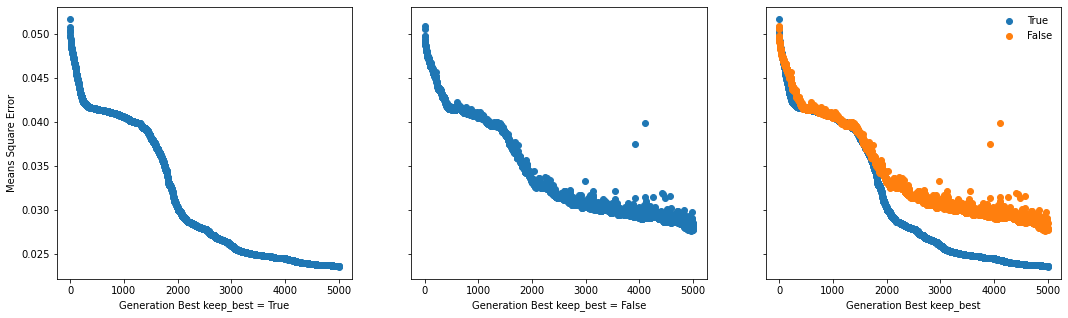

In [457]:
plot_compare(best_scores_kb_true, best_scores_kb_false)

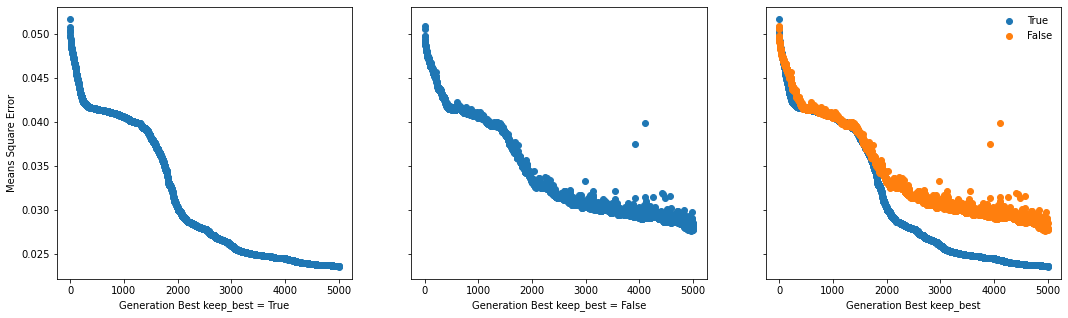

In [458]:
plot_compare(best_scores_kb_true, best_scores_kb_false)

# Nem az összes súlyt mutálja, hanem generációnként egyet véletlenszerűen kiválasztva

Egy nagyon jó magyarázat.

Tulajdonkép a `.copy()` csak egy ujabb pointer listát ad vissza, de a pointerek ugyan azokra az objektumokra mutatnak.

https://stackoverflow.com/questions/2612802/list-changes-unexpectedly-after-assignment-why-is-this-and-how-can-i-prevent-it



In [459]:
#
#
#
#
#
#      Ó, sajonos egy óriási bugot hagytam a programban, amit most ki kell javítanom
#
#
#      sajnos sima copy nem másolja az objektum jelen esetben az mlp_dummy objektum property filedjeit hanem úgy viselkedett mint egy pointer
#      ezért aztán bármilyen műveletet végeztem vele az az eredeti objektumon is végrehajtotta, szóval rossz volt
#
#
#
#
#

In [460]:
# Ez a kis példa mutatja, hogy mi a hiba

tlp_dummy = MLPRegressor((3, ), max_iter=1)
tlp_dummy.fit(_X_indicator, _y)       # << ---- Ez kell a súlyok inicializálásához

a = tlp_dummy.coefs_            # <--------- nem ám leteszi egy változóba
b = a                           # <--------- ez egyértelműen egy pointer ha b-t változtatom változni fog a is, de nem kéne, hogy változzon mlp_dummy.coef_
c = list(a)                     # <--------- ez sem segít, c nem egy új lista lesz, hanem egy nyomorult pointer ami még mindíg mlp_dummy.coef_-re mutat
d = deepcopy(a)                 # <--------- ez az egyetlen amivel egy új listát hozok létre, ami független mlp_dummy.coef_-től

print(id(a), id(b), id(c), id(d))

print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])

c[0][0][0] = 0.2                # <--------- felülcsapja a-t, b-t, c-t, ami még rosszabb  tlp_dummy.coefs_ értékét is
d[0][0][0] = 2.4                # <--------- ő viszont nem csap felül semmit

print(id(a), id(b), id(c), id(d))

print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])


140705412369456 140705412369456 140705406399104 140705412367216
0.6124709799093084
0.6124709799093084
0.6124709799093084
0.6124709799093084
0.6124709799093084
140705412369456 140705412369456 140705406399104 140705412367216
0.2
0.2
0.2
0.2
2.4


In [461]:
a = 10
b = 10
c = 20

print(id(a))
print(id(b))
print(id(c))

print(hash(a))
print(hash(b))
print(hash(c))

93912065305376
93912065305376
93912065305696
10
10
20


In [462]:
# Kicsit buzerálódok még ezzel mert nagyon zavar

tlp_dummy = MLPRegressor((3, ), max_iter=1)
tlp_dummy.fit(_X_indicator, _y)       # << ---- Ez kell a súlyok inicializálásához

a = tlp_dummy.coefs_            # <--------- nem ám leteszi egy változóba
b = a
c = list(tlp_dummy.coefs_.copy())
d = tlp_dummy.coefs_[:]
e = []
e.extend(tlp_dummy.coefs_)
f = list(tlp_dummy.coefs_)
g = list(tlp_dummy.coefs_.copy())
h = [i for i in tlp_dummy.coefs_]

k = deepcopy(a)                       # <------------ Ez a módszer működik ténylegesen másol

l = tlp_dummy.coefs_[0]               # <------------ Ez még mindíg egy pointer és nem egy új objektum
m = tlp_dummy.coefs_[0].copy()        # <------------ Ez viszont már egy új lista


print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])
print(e[0][0][0])
print(f[0][0][0])
print(g[0][0][0])
print(h[0][0][0])
print(k[0][0][0])
print(l[0][0])
print(m[0][0])


c[0][0][0] = 0.2                # <--------- felülcsapja a-t, b-t, c-t, ami még rosszabb  tlp_dummy.coefs_ értékét is
d[0][0][0] = 0.4                # <--------- ő viszont nem csap felül semmit

print(tlp_dummy.coefs_[0][0][0])
print(a[0][0][0])
print(b[0][0][0])
print(c[0][0][0])
print(d[0][0][0])
print(e[0][0][0])
print(f[0][0][0])
print(g[0][0][0])
print(h[0][0][0])
print(k[0][0][0])
print(l[0][0])
print(m[0][0])


-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
-1.0605181064959646
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
-1.0605181064959646
0.4
-1.0605181064959646


In [463]:
# Menjünk egy picit tovább, csak a működő megoldásokat hasonlítsuk össze

tlp_dummy = MLPRegressor((3, ), max_iter=1)
tlp_dummy.fit(_X_indicator, _y)       # << ---- Ez kell a súlyok inicializálásához

a = deepcopy(tlp_dummy.coefs_)        # < ----- Lista
b = tlp_dummy.coefs_[0].copy()        # < ----- Numpy.ndarray

print(type(a))
print(type(b))

b[0][0] = 0.9                         # <----- nincs hatással a-ra

print(a[0][0])
print(b[0])

a[0][0][0] = 0.1                      # <----- nincs hatással b-ra

print(a[0][0])
print(b[0])


<class 'list'>
<class 'numpy.ndarray'>
[1.18106505 0.55869325 0.55271826]
[0.9        0.55869325 0.55271826]
[0.1        0.55869325 0.55271826]
[0.9        0.55869325 0.55271826]


In [464]:
%%time

def task_deepcopy():
  a = deepcopy(tlp_dummy.coefs_)        # < ----- Lista
  # print(a[0][0])
  a[0][0][0] = np.random.randn()
  # print(a[0][0])
  return a

task_deepcopy()

CPU times: user 90 µs, sys: 1e+03 ns, total: 91 µs
Wall time: 96.3 µs


In [465]:
%%time

def task_numpy():
  b = tlp_dummy.coefs_[0].copy()        # < ----- Numpy.ndarray
  # print(b[0])
  b[0][0] = np.random.randn()
  # print(b[0])
  return b

task_numpy()

CPU times: user 58 µs, sys: 0 ns, total: 58 µs
Wall time: 62.9 µs


In [466]:
len(tlp_dummy.coefs_)

2

In [467]:
%%time

def task_numpy_full():
  # coefs_ = []
  b0 = tlp_dummy.coefs_[0].copy()        # < ----- Numpy.ndarray
  b1 = tlp_dummy.coefs_[1].copy()        # < ----- Numpy.ndarray
  b0[0][0] = np.random.randn()
  coefs_ = [b0, b1]
  return coefs_

task_numpy_full()

CPU times: user 275 µs, sys: 0 ns, total: 275 µs
Wall time: 245 µs


In [468]:
%%time
for i in range(100000):
  task_deepcopy()
print('--- end ---')

--- end ---
CPU times: user 743 ms, sys: 5 ms, total: 748 ms
Wall time: 751 ms


In [469]:
%%time
for i in range(100000):
  task_numpy()
print('--- end ---')

--- end ---
CPU times: user 176 ms, sys: 994 µs, total: 177 ms
Wall time: 178 ms


In [470]:
%%time
for i in range(100000):
  task_numpy_full()
print('--- end ---')

--- end ---
CPU times: user 267 ms, sys: 1.01 ms, total: 268 ms
Wall time: 269 ms


# Jó, most hogy láttuk, hogyan kéne ezt megcsinálni

írjuk át a legutolsó kódot és nézzük meg, hogy fut le

In [471]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):

  _coefs = coefs.copy()       # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer
  
  for i in range(len(coefs)):
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv2(mlp_dummy, generation = 10,
                population = 10,
                keep_best = False,
                print_population = True,
                print_generation = (True, 1),
                random_factor = 1000,
                solve = 'bad'):
  
  coefs = mlp_dummy.coefs_    # <--------------- nem úgy működik ahogy gondoltam, nem hoz létre új példányt hanem pointer

  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []

    best_score = 999999
    for j in range(population):
      
      if( solve == 'bad' ):
        coefs = best_mlp_solution.coefs_  # <------------------------ igazi szívás, ez ugyanis egy pointer
                                          #                           igy ha a cikluson belül értéket adok a best_mlp_solution.coefs_ nek
                                          #                           akkor következő iterációnál már nem az erdetei értékeket olvasa be
                                          #                           ahogy gondoltam volna, hanem egy már módosított értéket
                                          #
                                          #                           ezáltál --> továbbmegy ez a coef és később felülcsapom
      if( solve == 'good' ):
        coefs = deepcopy(best_mlp_solution.coefs_)

      # --> mutáció indul minden egyes egyed esetében
      if( keep_best == True ):
        if( j == 0):
          # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt -> ne randomizáljon
          a = coefs
          pass
        else:
          a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      else:
        a = randomizer(coefs, random_factor)              # --> randomizálja a súlyokat
      # --> vége a súlymutációnak

      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----< population iteráció vége

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [472]:

%%time
generation_scores_bad, best_scores_bad, best_mlp_bad = evolve_adv2(mlp_dummy,
                                                       generation = 1500,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100,
                                                       solve='bad')



best_score in generation i =  0  =  0.051483200516022974
best_score in generation i =  200  =  0.04265035690015338
best_score in generation i =  400  =  0.0417134673711741
best_score in generation i =  600  =  0.041307700606083915
best_score in generation i =  800  =  0.04079258400041726
best_score in generation i =  1000  =  0.0399309258265391
best_score in generation i =  1200  =  0.038345953775418676
best_score in generation i =  1400  =  0.03485647607715889
CPU times: user 7.88 s, sys: 32.5 ms, total: 7.91 s
Wall time: 7.94 s


In [473]:

%%time
generation_scores_good, best_scores_good, best_mlp_good = evolve_adv2(mlp_dummy,
                                                          generation = 1500,
                                                          keep_best = True,
                                                          print_population=False,
                                                          print_generation=(True, 100),
                                                          random_factor=200,
                                                          solve='good')



best_score in generation i =  0  =  0.051982008056218686
best_score in generation i =  100  =  0.04673913309228521
best_score in generation i =  200  =  0.04407023953493422
best_score in generation i =  300  =  0.04220504017582005
best_score in generation i =  400  =  0.04169426339061363
best_score in generation i =  500  =  0.04156414528676535
best_score in generation i =  600  =  0.041449777855168256
best_score in generation i =  700  =  0.041306149312998294
best_score in generation i =  800  =  0.041243236535734924
best_score in generation i =  900  =  0.04116767636638396
best_score in generation i =  1000  =  0.04104987615988238
best_score in generation i =  1100  =  0.040970670812538364
best_score in generation i =  1200  =  0.04087321446429371
best_score in generation i =  1300  =  0.04075216982951761
best_score in generation i =  1400  =  0.04058536881881254
CPU times: user 8.39 s, sys: 60.3 ms, total: 8.45 s
Wall time: 8.48 s


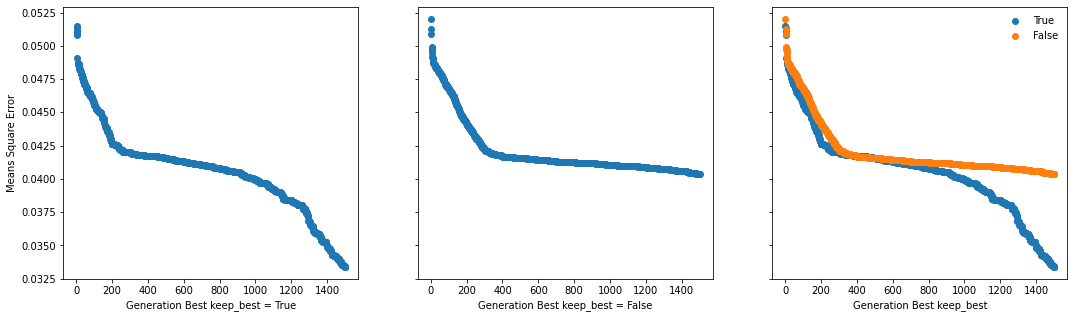

In [474]:
plot_compare(best_scores_bad, best_scores_good)

In [475]:
# Inicializáljuk újra a súlyokat

mlp_dummy = MLPRegressor(hidden_layer_sizes=(3, ), activation='tanh', max_iter = 1)

mlp_dummy.fit(_X_indicator, _y)


MLPRegressor(activation='tanh', hidden_layer_sizes=(3,), max_iter=1)

# Átírtam a kódot ami helytelenül működött



```
# Ami még fontossabb, hogy le is ellenőrzitem mind a négy beállításra

# - keep_best and only_one

# Ez most az ultimate kód.
```



In [476]:

# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer_adv_redit(coefs, random_factor, only_one, solve):
  if( solve == 'bad' ):
    _coefs = coefs.copy()       # ----> hát ez csak egy pointer sajnos
  if( solve == 'good' ):
    _coefs = deepcopy(coefs)    # ----> ez a jó megoldás, bár költséges

  # Fent.:
  #
  # Elvileg akár ki is lehetne hagyni mivel a paraméterként átadott 'coefs' már a függvény hívásakor deepcopyzva lett

  # ---> meg kéne próbálnom majd egy új numpy tömbbe raknom és minden körben felülcsapnom.

  if( only_one == False ):
    for i in range(len(coefs)):
      _ranodm_stregth = random_factor
      _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / _ranodm_stregth
      _coefs[i] = coefs[i] + _random_disturbance
      # _coefs[i] = coefs[i] # <--- means no change

  if( only_one == True ):
    # ki kell választani a réteget
    _number_of_layers = len(coefs)

    # összesen ennyi rétegünk van
    _random_layer = np.random.randint(low=0, high=_number_of_layers, size=None)

    _row = _coefs[_random_layer].shape[0]
    _col = _coefs[_random_layer].shape[1]

    _random_row = np.random.randint(low = 1, high = _row + 1)    # fontos, hogy low = 1 és high = _row + 1
    _random_col = np.random.randint(low = 1, high = _col + 1)    # fontos, hogy low = 1 és high = _col + 1

    # okép mevan, hogy melyik tömb melyik sorát oszloát kell kiválasztani és mutálni
    _random_disturbance = np.random.randn() / random_factor          # egyetlen egy random számot kérünk
    _selected_weigth_value = _coefs[_random_layer][_random_row -1, _random_col - 1]

    _coefs[_random_layer][_random_row -1, _random_col -1] = _coefs[_random_layer][_random_row -1, _random_col -1] + _random_disturbance

  return _coefs

def evolve_adv_redit(mlp_dummy, generation = 10,
                     population = 10,
                     only_one = False,
                     keep_best = False,
                     print_population = True,
                     print_generation = (True, 1),
                     random_factor = 1000,
                     print_coefs_ = False,
                     solve = 'bad'):
  
  coefs = mlp_dummy.coefs_

  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []

    generation_mlp = deepcopy(best_mlp_solution)

    best_score = 999999
    best_individual = 0
    for j in range(population):

      clone_mlp = deepcopy(generation_mlp) # --> elvileg ezzel szavatolom, hogy minen 'j'-ben lekérje

      if( print_coefs_ ):
        print('------------------------------------')
        print('clone_mlp ----> 1')
        print(clone_mlp.coefs_)


      # Fent.:
      #
      # Leellenőriztem, és tényleg az eredeti súlyokat kapja meg.

      coefs = clone_mlp.coefs_ # --> megkapja az éppen legjobb coeficienseit

      # --> mutáció indul minden egyes egyed esetében
      if( keep_best == True ):
        if( j == 0):
          # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt és ne randomizáljon
          a = coefs
          # print('---------> 1 egyed a populációban megörökli a súlyt')
          pass
        else:
          a = randomizer_adv_redit(coefs, random_factor, only_one, solve)            # --> randomizálja a súlyokat
      else:
        a = randomizer_adv_redit(coefs, random_factor, only_one, solve)              # --> randomizálja a súlyokat
      # --> vége a súlymutációnak

      clone_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = clone_mlp.predict(_X_indicator)

      # kis oknyomozás
      if( print_coefs_ ):
        print('------------------------------------')
        print('best_mlp_solution')
        print(best_mlp_solution.coefs_)
        print('\n')
        print('generation_mlp')
        print(generation_mlp.coefs_)
        print('\n')
        print('clone_mlp')
        print(clone_mlp.coefs_)
        print('------------------------------------')

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_individual = j
        best_score = score
        best_mlp_solution = deepcopy(clone_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        if( print_coefs_ ) : print('\n\n')
        print('best_score in generation i = ', i, ' = ', best_score)
        if( print_coefs_ ) :print('found in individual j = ', best_individual, '\n\n')

  return generation_holder, best_score_holder, best_mlp_solution


In [478]:

generation_scores_bad, best_scores_bad, best_mlp_bad = evolve_adv_redit(mlp_dummy,
                                                                        generation = 2,
                                                                        population = 3,
                                                                        only_one = True,
                                                                        keep_best = True,
                                                                        print_population = True,
                                                                        print_generation = (True, 1),
                                                                        random_factor = 1000,
                                                                        print_coefs_ = True,
                                                                        solve = 'bad')


------------------------------------
clone_mlp ----> 1
[array([[0.84965206, 0.07815753, 0.49208098]]), array([[-0.04435895],
       [-0.77165209],
       [ 0.10306883]])]
------------------------------------
best_mlp_solution
[array([[0.84965206, 0.07815753, 0.49208098]]), array([[-0.04435895],
       [-0.77165209],
       [ 0.10306883]])]


generation_mlp
[array([[0.84965206, 0.07815753, 0.49208098]]), array([[-0.04435895],
       [-0.77165209],
       [ 0.10306883]])]


clone_mlp
[array([[0.84965206, 0.07815753, 0.49208098]]), array([[-0.04435895],
       [-0.77165209],
       [ 0.10306883]])]
------------------------------------
i =  0 j =  0 score =  1.5974195907904798
------------------------------------
clone_mlp ----> 1
[array([[0.84965206, 0.07815753, 0.49208098]]), array([[-0.04435895],
       [-0.77165209],
       [ 0.10306883]])]
------------------------------------
best_mlp_solution
[array([[0.84965206, 0.07815753, 0.49208098]]), array([[-0.04435895],
       [-0.77165209],


# Ellenőrzés megvolt, egy utolsó futás

In [479]:

generation_scores, best_scores, best_mlp = evolve_adv_redit(mlp_dummy,
                                                            generation = 100,
                                                            population = 10,
                                                            only_one = True,
                                                            keep_best = True,
                                                            print_coefs_ = False,
                                                            print_population = False,
                                                            print_generation = (True, 10),
                                                            random_factor = 1000,
                                                            solve = 'bad')


best_score in generation i =  0  =  1.5945613660597495
best_score in generation i =  10  =  1.5806632761589297
best_score in generation i =  20  =  1.5644552238809148
best_score in generation i =  30  =  1.5530102952399694
best_score in generation i =  40  =  1.5388249973482613
best_score in generation i =  50  =  1.522639566755243
best_score in generation i =  60  =  1.5127941126626445
best_score in generation i =  70  =  1.4974683069885526
best_score in generation i =  80  =  1.4819691093750067
best_score in generation i =  90  =  1.466554344038725


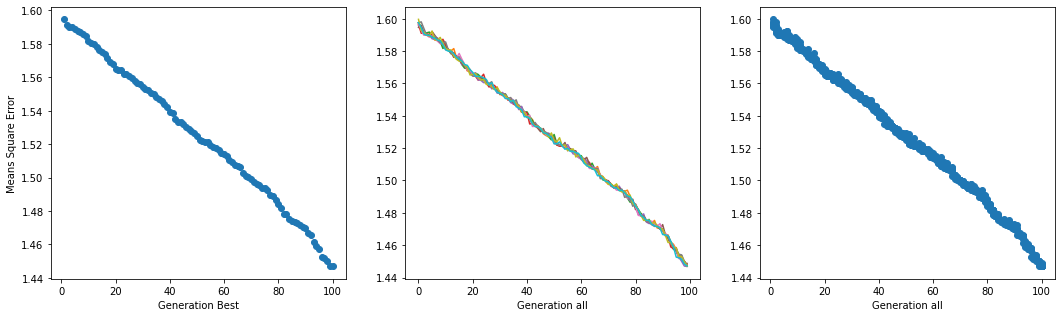

In [480]:
plot(generation_scores, best_scores)

# Bonyolult hálóval

In [481]:
mlp_small = MLPRegressor(hidden_layer_sizes=(20, 5), max_iter=1)

mlp_small.fit(_X_indicator, _y)

MLPRegressor(hidden_layer_sizes=(20, 5), max_iter=1)

In [482]:
# Bonyolult hálóval

%%time

generation_scores, best_scores, best_mlp = evolve_adv_redit(mlp_small,
                                                            generation = 5000,
                                                            population = 10,
                                                            only_one = True,
                                                            keep_best = False,
                                                            print_coefs_ = False,
                                                            print_population = False,
                                                            print_generation = (True, 500),
                                                            random_factor = 10,
                                                            solve = 'bad')


best_score in generation i =  0  =  1.5805545148896158
best_score in generation i =  500  =  0.02564385409964637
best_score in generation i =  1000  =  0.012006203884613535
best_score in generation i =  1500  =  0.011117177228482463
best_score in generation i =  2000  =  0.010693122949428027
best_score in generation i =  2500  =  0.010547823470867529
best_score in generation i =  3000  =  0.01023095555931416
best_score in generation i =  3500  =  0.009793384717381073
best_score in generation i =  4000  =  0.009449665967957335
best_score in generation i =  4500  =  0.009387032816141408
CPU times: user 58.1 s, sys: 260 ms, total: 58.4 s
Wall time: 58.4 s


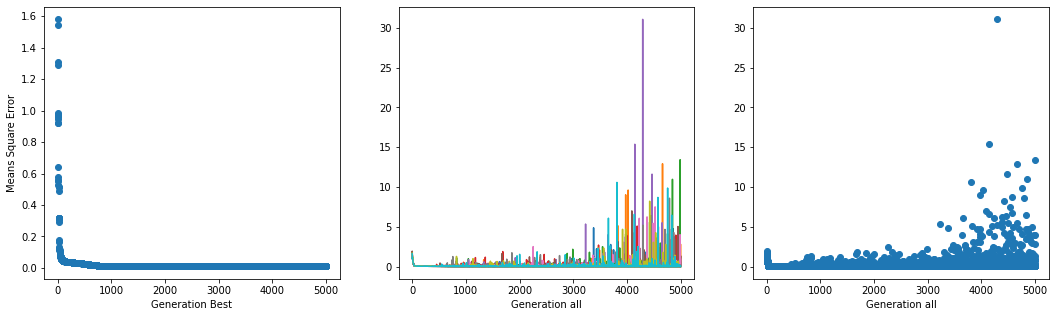

In [483]:
plot(generation_scores, best_scores)

score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315
score after evolve the net =  0.009320886387136202


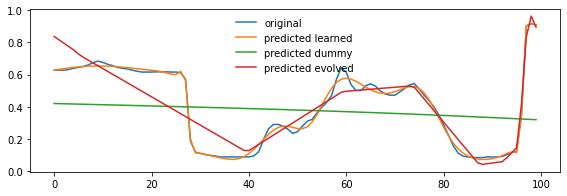

In [484]:
plot_two(mlp, best_mlp)

In [485]:
# mi lenne az adott hálóval elméletileg elérhető maximum

mlp_best_cont = deepcopy(best_mlp)

mlp_best_cont.set_params().warm_start = True
mlp_best_cont.set_params().max_iter = 5000
mlp_best_cont.set_params().n_iter_no_change = 5000
mlp_best_cont.set_params().random_state = 1

mlp_best_cont.get_params()

# tanítsuk tovább a klónozott hálót
mlp_best_cont.fit(_X_indicator, _y)

# csináljuk meg a becslést az ábrázoláshoz
pred_c = mlp_best_cont.predict(_X_indicator)

# csináljuk meg a hiba számítást
score_c = mean_squared_error(_y, pred_c)
print('score after evolve the net = ', score_c)

score after evolve the net =  0.001942540604061164


score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315
score after evolve the net =  0.001942540604061164


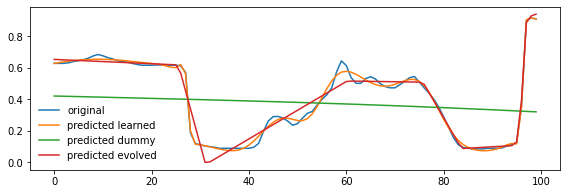

In [486]:
# A GA-val kezdett majd GD-vel folytatott

plot_two(mlp_small, mlp_best_cont)

score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315
score after evolve the net =  0.009320886387136202


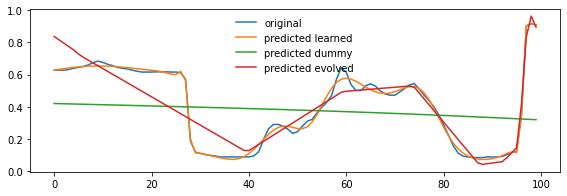

In [487]:
# A GA-val kezdett, és úgy is hagytam nem tanítottam tovább GD-vel

plot_two(mlp_small, best_mlp)

# Mi lenne a maximum amit ebből a hálóból ki lehetne hozni GD-vel?

score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315
score after evolve the net =  0.023214194603336877


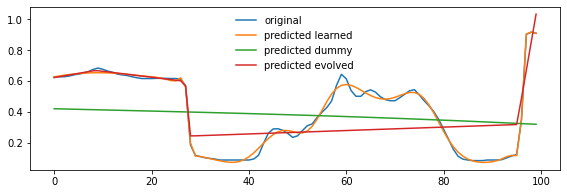

In [488]:
mlp_gd = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=15000,
                      n_iter_no_change = 15000)

mlp_gd.fit(_X_indicator, _y)

plot_two(mlp_small, mlp_gd)


# Egy fájdalmas kísérlet

Csak, hogy bemutassam mennyire nagy jelentősége van a súlyok kiinduló inicializálásának megtanítom ezt a neurális háló különböző véletlen kiinduló állapotokból és összehasonlítjuk a végén az eredményeket.

Score i =  0   0.03618045918813199
Score i =  1   0.264669010004212
Score i =  2   0.04721940229193915
Score i =  3   0.031621908772382995
Score i =  4   0.035921097998810894
Score i =  5   0.03757717494286923
Score i =  6   0.03350019387234507
Score i =  7   0.39236408241839205
Score i =  8   0.048784480171370805
Score i =  9   0.03384507241887573
-
First score =  0.031621908772382995
Worst score =  0.39236408241839205
-


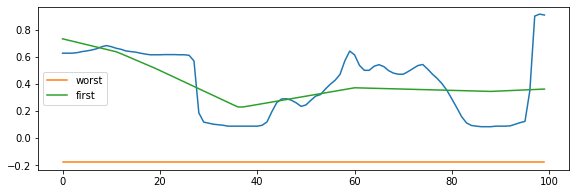

In [489]:
score_holder = []
worst_mlp = None
first_mlp = None
worst_pred = None
first_pred = None
worst_score = 0.0
first_score = 999
for i in range(10):
  _max_iter = 1000
  _random_state = i
  mlp_rand = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=_max_iter,
                      random_state = i,
                      n_iter_no_change = _max_iter)

  mlp_rand.fit(_X_indicator, _y)
  pred_rand = mlp_rand.predict(_X_indicator)
  score_rand = mean_squared_error(_y, pred_rand)
  tupli = (i, score_rand)
  score_holder.append(tupli)
  print('Score i = ', i, ' ', score_rand)
  if( score_rand > worst_score ):
    worst_score = score_rand
    worst_mlp = deepcopy(mlp_rand)
    worst_pred = pred_rand.copy()
  if( score_rand < first_score ):
    first_score = score_rand
    first_mlp = deepcopy(mlp_rand)
    first_pred = pred_rand.copy()

print('-')
print('First score = ', first_score)
print('Worst score = ', worst_score)
print('-')
plt.figure(figsize=(9.5, 3)); plt.plot(_y); plt.plot(worst_pred, label='worst'); plt.plot(first_pred, label='first'); plt.legend(); plt.show()

# Gondolatok a fent látottakhoz

Elszomorító, hogy ennyire komoly hatással van a kiinduló súlyok inicializációja a tanulás sebességére, nem utolsó sorban pedig a végeredményére.

### A vicc kedvéért ugyan ez csak hosszab tanítással

Score i =  0   0.03521078223016572
Score i =  1   0.06201968283765178
Score i =  2   0.041970889025574866
Score i =  3   0.02407102154901506
Score i =  4   0.03390522366527596
Score i =  5   0.03442208611815395
Score i =  6   0.02546683498955956
Score i =  7   0.07537801769662378
Score i =  8   0.04860481856269902
Score i =  9   0.03003774777818469
-
First score =  0.02407102154901506
Worst score =  0.07537801769662378
-


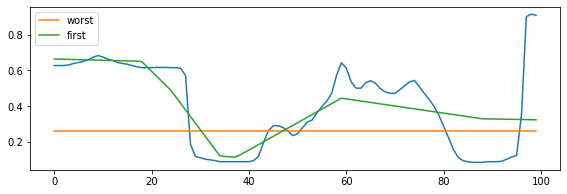

In [490]:
score_holder = []
worst_mlp = None
first_mlp = None
worst_pred = None
first_pred = None
worst_score = 0.0
first_score = 999
for i in range(10):
  _max_iter = 2000
  _random_state = i
  mlp_rand = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=_max_iter,
                      random_state = i,
                      n_iter_no_change = _max_iter)

  mlp_rand.fit(_X_indicator, _y)
  pred_rand = mlp_rand.predict(_X_indicator)
  score_rand = mean_squared_error(_y, pred_rand)
  tupli = (i, score_rand)
  score_holder.append(tupli)
  print('Score i = ', i, ' ', score_rand)
  if( score_rand > worst_score ):
    worst_score = score_rand
    worst_mlp = deepcopy(mlp_rand)
    worst_pred = pred_rand.copy()
  if( score_rand < first_score ):
    first_score = score_rand
    first_mlp = deepcopy(mlp_rand)
    first_pred = pred_rand.copy()

print('-')
print('First score = ', first_score)
print('Worst score = ', worst_score)
print('-')
plt.figure(figsize=(9.5, 3)); plt.plot(_y); plt.plot(worst_pred, label='worst'); plt.plot(first_pred, label='first'); plt.legend(); plt.show()

In [491]:
er = [a[1] for a in score_holder]

er = [a[1] for a in score_holder if a[1] > 0.04]

er

[0.06201968283765178,
 0.041970889025574866,
 0.07537801769662378,
 0.04860481856269902]

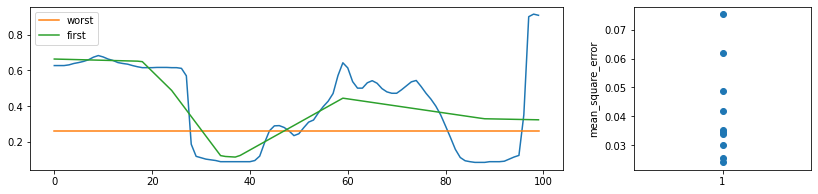

In [492]:
fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})

a0.plot(_y);
a0.plot(worst_pred, label='worst');
a0.plot(first_pred, label='first');
a0.legend();

a1.scatter(np.ones(len(score_holder)), [a[1] for a in score_holder])
a1.set_ylabel('mean_square_error')
a1.set_xticks([1])
plt.show()


# Csak kíváncsiságból sok GD sok Inivel



In [493]:
score_holder = []
worst_mlp = None
first_mlp = None
worst_pred = None
first_pred = None
worst_score = 0.0
first_score = 999
for i in range(50):
  _max_iter = 2000
  _random_state = i
  mlp_rand = MLPRegressor(hidden_layer_sizes=(20, 5),
                      max_iter=_max_iter,
                      random_state = i,
                      n_iter_no_change = _max_iter)

  mlp_rand.fit(_X_indicator, _y)
  pred_rand = mlp_rand.predict(_X_indicator)
  score_rand = mean_squared_error(_y, pred_rand)
  tupli = (i, score_rand)
  score_holder.append(tupli)
  if( score_rand > worst_score ):
    worst_score = score_rand
    worst_mlp = deepcopy(mlp_rand)
    worst_pred = pred_rand.copy()
    print('Score i = ', i, ' ', score_rand)
  if( score_rand < first_score ):
    first_score = score_rand
    first_mlp = deepcopy(mlp_rand)
    first_pred = pred_rand.copy()
    print('Score i = ', i, ' ', score_rand)

print('-')
print('First score = ', first_score)
print('Worst score = ', worst_score)
print('-')

Score i =  0   0.03521078223016572
Score i =  0   0.03521078223016572
Score i =  1   0.06201968283765178
Score i =  3   0.02407102154901506
Score i =  7   0.07537801769662378
Score i =  10   0.023967807079093927
Score i =  11   0.020984786077218664
Score i =  19   0.015750760150976605
Score i =  22   0.009894057172693677
Score i =  24   0.004300648735841566
-
First score =  0.004300648735841566
Worst score =  0.07537801769662378
-


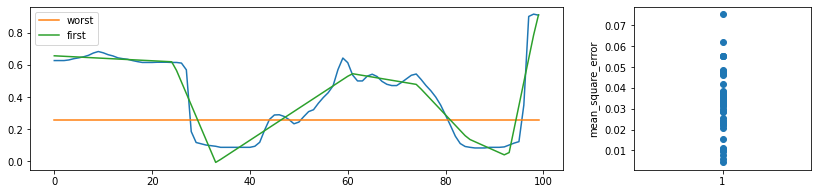

In [494]:
fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})

a0.plot(_y);
a0.plot(worst_pred, label='worst');
a0.plot(first_pred, label='first');
a0.legend();

a1.scatter(np.ones(len(score_holder)), [a[1] for a in score_holder])
a1.set_ylabel('mean_square_error')
a1.set_xticks([1])
plt.show()


# Tovább gondolási lehetőségek



```
# 1. a random_factor értékét egyedenként, vagy generácionként véletlenszerűen változtatjuk, így néha nagy lenne a mutáció mértéke néha kicsit.

#   - kérdés, hogy így a rendszer gyorsabban konvergál-e
```



# First net

[ 1 20  5  1]


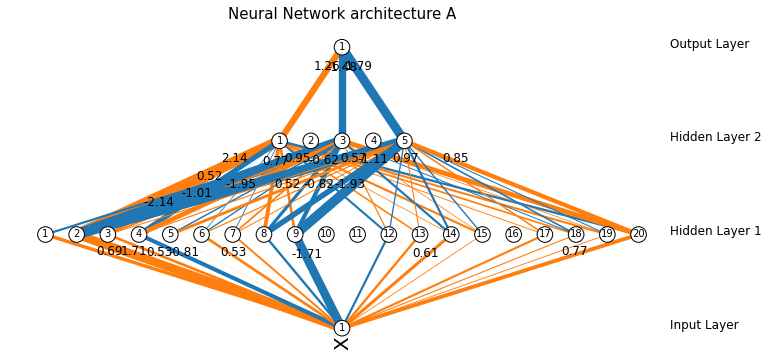

In [495]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

net = first_mlp

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()

# Worst net

[ 1 20  5  1]


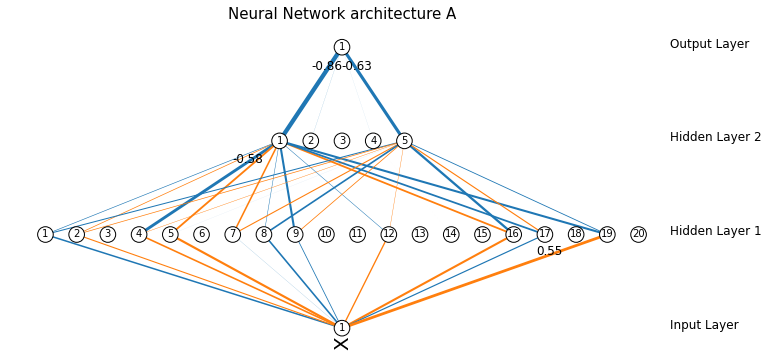

In [496]:
num_input_varialbe = ['X']

net = worst_mlp

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()

# Visualise net

[ 1 10 20  1]


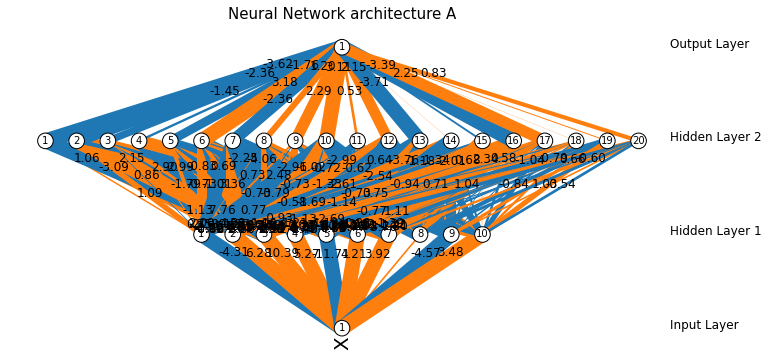

In [497]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(mlp.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, mlp.coefs_, num_input_varialbe)
network.draw()



```
# JoDeMiro
```

